<a href="https://colab.research.google.com/github/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas (imports) e Macros

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
new_cols = {}
new_cols_test = {}
remove_cols = set()

# EDA

## Panorama

In [180]:
# ler train.csv
df = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/train.csv',
                 index_col = 0)

df_test = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/test.csv',
                    index_col = 0)

# verificar numero de linhas e colunas
df.shape


(1460, 80)

In [181]:
df_test.shape

(1459, 79)

Demos load tanto no Df, quanto no Df_test.</br>
Todas as analises sao realizadas em Df, todas as alteracoes e normalizacoes sao realizadas tanto em Df, quanto em Df_test.</br>
A razão para isto é que o código iria quebrar se trocassemos a variavel para test, visto que saleprice é usado em diversos momentos.

In [182]:
# Uma primeira visualizacao dos dados
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
# Verificar colunas, número de entradas não nulas e tipo das colunas
# Batendo dados com o dicionário: https://github.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/data_description.txt
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Pontos de Atenção:
- MSSubClass é categórico
- Street é binário [Grvl/Pave]
- OverallQual é uma nota (likert)
- OverallCond é uma nota (likert)
- CentralAir é binário [N/Y]

Colunas com muitos nulos:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

In [184]:
# transformar numeros que representam categorias em objetos
# df[['MSSubClass', 'OverallQual', 'OverallCond']] =
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

In [185]:
# listar apenas as colunas que possuem valores nulos
df.isnull().sum()[df.isnull().sum() > 0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Sera estudado caso a caso para saber se removemos ou não.
As colunas binárias serão tratadas junto com as demais categoricas se necessário alguma camada de encoding.

In [186]:
# Examinando colunas numéricas
col_num = df.select_dtypes(include= 'number').columns
print('colunas numéricas:', len(col_num))
print(col_num)

colunas numéricas: 34
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [187]:
# Examinando colunas categóricas
col_cat = df.select_dtypes(exclude= 'number').columns
print('colunas numéricas:', len(col_cat))
print(col_cat)

colunas numéricas: 46
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


Adicionando uma coluna para facilitar futuras analises

In [188]:
#add Coluna SalePrice/Area
df['SalePrice/Area'] = df['SalePrice']/df['LotArea']

## Hipoteses

### Testar se há relacao entre:
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet

In [189]:
# LowQualFinSF is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['LowQualFinSF'] ).sort_values()

Id
126      286
171      326
534      334
1101     438
52       456
        ... 
1170    3627
692     4316
1183    4476
524     4676
1299    5642
Length: 1460, dtype: int64

In [190]:
# GrLivArea is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['GrLivArea'] ).sort_values()

Id
186    -572
171    -528
636    -515
1010   -514
89     -513
       ... 
490       0
489       0
488       0
486       0
1460      0
Length: 1460, dtype: int64

In [191]:
# GrLivArea is equal the sum of the rest?
( df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'] - df['GrLivArea'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

GrLivArea é a soma de 1stFlrSF, 2ndFlrSF e LowQualFinSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes.

Posteriormente, podemos eliminar a variavel, se quisermos.

In [192]:
df = df.drop(columns= 'GrLivArea')
df_test = df_test.drop(columns= 'GrLivArea')
remove_cols.add('GrLivArea')

### Testar se há relacao entre:
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

In [193]:
# TotalBsmtSF is equal the sum of the rest?
( df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF'] - df['TotalBsmtSF'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

TotalBsmtSF é a soma de BsmtFinSF1, BsmtFinSF2 e BsmtUnfSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes.

Posteriormente, podemos eliminar a variavel, se quisermos.

In [194]:
# df = df.drop(columns= 'TotalBsmtSF')
# df_test = df_test.drop(columns= 'TotalBsmtSF')
# remove_cols.add('TotalBsmtSF')

Funcao preencher nulos

In [195]:
#Funcao preencher nulos. Primeiro verifica se a coluna é numérica ou categórica, depois preenche com 0, caso seja numerico
#ou com 'N/A' por default, mas aceitando outros valores como parametro
def preencher_nulos(df, col, valor, df_name):
    #primeiro verifica se a coluna tem valores nulos
    aux = df[col].isnull().sum()
    if aux > 0:
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(0)
            valor = 0
        else:
            df[col] = df[col].fillna(valor)
    aux2 = df[col].isnull().sum()
    print('Coluna', col, 'preenchida com', valor, 'em', aux-aux2, 'entradas no dataset', df_name, 'sobrando', aux2, 'entradas nulas')

Funcao para printar os dados mais importantes para analise, também preenche nulos

In [196]:
def print_unique_values(col, df, df2, valor='N/A', other_cols=[], preencher=True):
    # Chamar função preencher_nulos em ambos os dataframes
    if preencher:
        preencher_nulos(df, col, valor, 'Treino')
        preencher_nulos(df2, col, valor, 'Teste')
    
    pd.options.display.float_format = '{:.2f}'.format
    data = []
    for i in df[col].unique():
        count = df[df[col] == i]['SalePrice'].count()
        price_mean = df[df[col] == i]['SalePrice'].mean()
        price_std = df[df[col] == i]['SalePrice'].std()
        price_area_mean = price_mean / df[df[col] == i]['LotArea'].mean()
        price_area_std = df[df[col] == i]['SalePrice/Area'].std()
        other_cols_mean = [df[df[col] == i][c].mean() for c in other_cols]
        other_cols_std = [df[df[col] == i][c].std() for c in other_cols]
        data.append([i, count, price_mean, price_std, price_area_mean, price_area_std, *other_cols_mean])
    
    headers = [col, "Count", "Price", "Std", "Area_Price", "Std/Area", *other_cols]
    result_df = pd.DataFrame(data, columns=headers)
    
    # Ordenar o DataFrame pelo valor da coluna 'Mean' em ordem decrescente
    result_df = result_df.sort_values(by='Price', ascending=False)
    
    display(result_df)


## Colunas com muitos nulos

#### PoolQC e PoolArea(1453 nulos)

In [197]:
print_unique_values('PoolQC', df, df_test)

Coluna PoolQC preenchida com N/A em 1453 entradas no dataset Treino sobrando 0 entradas nulas
Coluna PoolQC preenchida com N/A em 1456 entradas no dataset Teste sobrando 0 entradas nulas


,PoolQC,Count,Price,Std,Area_Price,Std/Area
1,Ex,2,490000.00,360624.46,23.88,27.18
2,Fa,2,215500.00,48790.37,16.06,2.03
3,Gd,3,201990.00,63441.39,6.48,7.76
0,N/A,1453,180404.66,78168.87,17.25,12.38


Mesmo havendo uma diferenca de preco entre as casas com e sem piscina, o fato de apenas 7 casas possuirem piscina pode nao ser suficiente para justificar a coluna.
Acreditamos que haverão outros fatores que influenciam mais no preço da casa, como por exemplo a localização, o tamanho da casa, etc.

In [198]:
df = df.drop(columns= 'PoolQC')
df_test = df_test.drop(columns= 'PoolQC')
remove_cols.add('PoolQC')
#remover tambem a coluna PoolArea
df = df.drop(columns= 'PoolArea')
df_test = df_test.drop(columns= 'PoolArea')
remove_cols.add('PoolArea')

In [199]:
#lista de dropcol
remove_cols

{'GrLivArea', 'PoolArea', 'PoolQC'}

#### MiscFeature (1406 nulos)

In [200]:
# Os valores representam outas caracteristicas nao representadas em outra colunas. No dicionario:
# MiscFeature: Miscellaneous feature not covered in other categories
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF) -> barracão
#        TenC	Tennis Court
#        NA	None
print_unique_values('MiscFeature', df, df_test)


Coluna MiscFeature preenchida com N/A em 1406 entradas no dataset Treino sobrando 0 entradas nulas
Coluna MiscFeature preenchida com N/A em 1408 entradas no dataset Teste sobrando 0 entradas nulas


,MiscFeature,Count,Price,Std,Area_Price,Std/Area
4,TenC,1,250000.00,NaN,14.98,NaN
0,N/A,1406,182046.41,80084.14,17.67,12.51
2,Gar2,2,170750.00,27223.61,10.79,1.28
1,Shed,49,151187.61,51642.73,9.25,5.33
3,Othr,2,94000.00,55154.33,10.60,0.80


Como há poucos valores para outras categorias alem de Shed (barracão),Vamos trocar a coluna para shed </br>
Os demais valores foram substituidos por N.

In [201]:
#trocar nome da coluna MiscFeature de df e df_test para Shed
df = df.rename(columns={'MiscFeature': 'Shed'})
df_test = df_test.rename(columns={'MiscFeature': 'Shed'})

#trocar tambem todos os demais valores para N/A
df['Shed'] = df['Shed'].replace(['Gar2', 'Othr', 'TenC'], 'N/A')

In [202]:
#map Shed para 0 e 1
df['Shed'] = df['Shed'].map({'N/A': 0, 'Shed': 1})

#### Alley (1369 nulos)

In [203]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# Alley: Type of alley access to property
    # Grvl	Gravel
    # Pave	Paved
    # NA 	No alley access
print_unique_values('Alley', df, df_test)

Coluna Alley preenchida com N/A em 1369 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Alley preenchida com N/A em 1352 entradas no dataset Teste sobrando 0 entradas nulas


,Alley,Count,Price,Std,Area_Price,Std/Area
0,N/A,1369,183452.13,80667.15,17.13,11.93
2,Pave,41,168000.59,38370.38,28.22,19.11
1,Grvl,50,122219.08,34780.78,13.68,7.22


In [204]:
#verificar quantos N/A existem em Alley
df['Alley'].isnull().sum()

0

In [205]:
#verificar quantos N/A existem em Alley
df_test['Alley'].isnull().sum()

0

Existe uma relação entre ter um Alley, e seus respectivos valores, porem, a mesma relacao nao é tao forte quando se trata de Mean/Area.

Mesmo assim, optamos por preencher os dados da seguinte maneira:

In [206]:
#Fazer map para transformar Alley em numerico, com Grvl=0, Pave=1 e N/A=2
df['Alley'] = df['Alley'].map({'Grvl': 0, 'Pave': 1, 'N/A': 2})
df_test['Alley'] = df_test['Alley'].map({'Grvl': 0, 'Pave': 1, 'N/A': 2})

#### Fence (1179 nulos)

In [207]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fence
print_unique_values('Fence', df, df_test)

Coluna Fence preenchida com N/A em 1179 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Fence preenchida com N/A em 1169 entradas no dataset Teste sobrando 0 entradas nulas


,Fence,Count,Price,Std,Area_Price,Std/Area
0,N/A,1179,187596.84,81656.50,17.46,12.99
3,GdPrv,59,178927.46,56757.24,17.01,13.67
1,MnPrv,157,148751.09,66096.07,16.16,5.65
2,GdWo,54,140379.31,53592.59,14.57,6.98
4,MnWw,11,134286.36,21781.81,14.52,6.11


Casas sem cerca sao mais valiosas que casas com cerca. 
Acreditamos que este dataset não contem erros, e por isto, podem significa estar em uma area mais nobre/condomonio com regras.
De toda forma, decidir dar um Map nessas informacoes, transformando Os valores MnWw, GdWo, MnPrv em 1, GdPrv em 2, N/A em 3.

In [208]:
#transformar Fence em numerico, com MnWw=1, GdWo=1, MnPrv=1, GdPrv=2 e N/A=3
df['Fence'] = df['Fence'].map({'MnWw': 0, 'GdWo': 0, 'MnPrv': 0, 'GdPrv': 1, 'N/A': 2})
df_test['Fence'] = df_test['Fence'].map({'MnWw': 0, 'GdWo': 0, 'MnPrv': 0, 'GdPrv': 1, 'N/A': 2})

#### LotFrontage (259 nulos)

<Axes: ylabel='Frequency'>

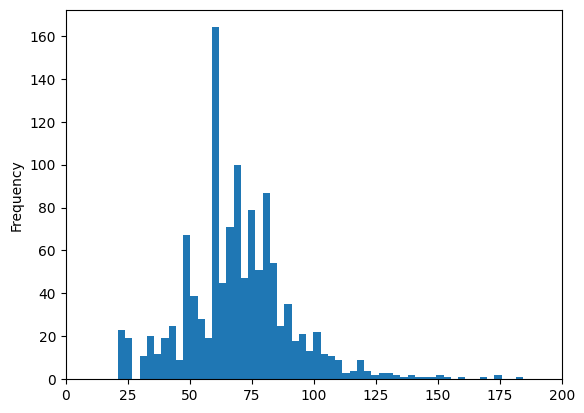

In [209]:
# como é uma variavel numerica, vamos avaliar a distribuicao, mostar apenas dados entre 0 e 200.
df.LotFrontage.plot.hist(bins=100, xlim=(0,200))

In [210]:
#criar uma coluna com a raiz quadrada de lotarea
df['LotArea_sqrt'] = np.sqrt(df['LotArea'])

#qual é a soma de todos os valores LotArea_sqrt e a soma de todos os valores LotArea para dados com LotFrontage > 0?
df[df['LotFrontage'] > 0][['LotFrontage', 'LotArea_sqrt']].sum()



LotFrontage     84130.00
LotArea_sqrt   115956.33
dtype: float64

<Axes: >

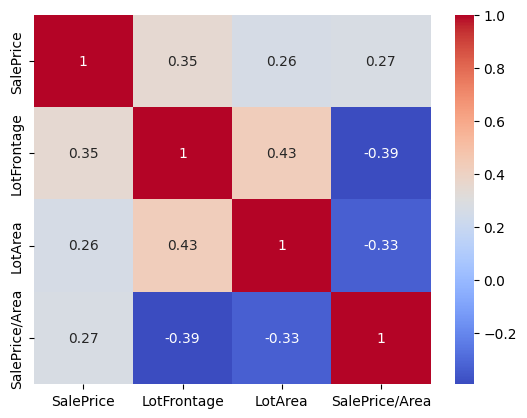

In [211]:
#heatmap sales, lotfrontage e lotarea
sns.heatmap(df[['SalePrice', 'LotFrontage', 'LotArea', 'SalePrice/Area']].corr(), annot=True, cmap='coolwarm')

In [212]:
#chamar funcao ver dados
print_unique_values('LotFrontage', df, df_test, other_cols=['LotArea', 'Alley'], preencher=False)

,LotFrontage,Count,Price,Std,Area_Price,Std/Area,LotArea,Alley
106,160.00,1,745000.00,NaN,47.69,NaN,15623.00,2.00
95,104.00,3,473333.33,287677.48,30.59,11.34,15471.33,2.00
76,118.00,2,415000.00,296984.85,16.78,1.78,24732.00,2.00
79,150.00,1,375000.00,NaN,1.74,NaN,215245.00,2.00
54,107.00,7,342947.57,167045.55,27.19,10.53,12612.29,2.00
...,...,...,...,...,...,...,...,...
26,33.00,1,113000.00,NaN,25.36,NaN,4456.00,2.00
36,21.00,23,94278.26,13823.04,54.60,9.60,1726.61,2.00
93,45.00,3,80500.00,31036.27,9.77,3.75,8236.00,0.00
109,153.00,1,52500.00,NaN,12.75,NaN,4118.00,0.00


Valores nulos antes: 259
Valores nulos depois: 0
Valores nulos antes: 227
Valores nulos depois: 0


<Axes: ylabel='Frequency'>

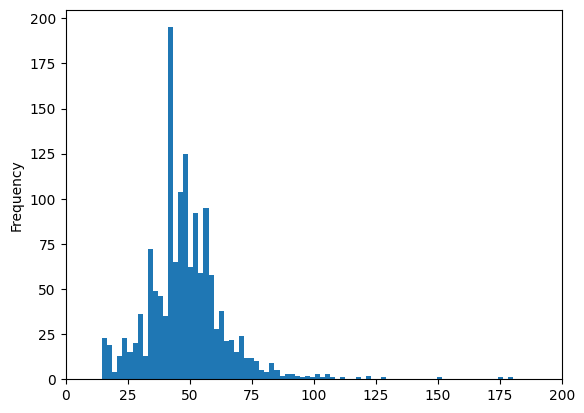

In [213]:
# Como muitos dos dados são nulos, e 'LotArea' nunca é nulo,
# podemos inputar o valor como sendo raiz da area menos 37%(os lotes no geral nao sao quadrados), + um valor punitivo de 30%, visto que o lote nao tem frente pra a rua
def LotFrontage_sqrt_area(df_base):
    #verificar quantos valores nulos temos e foram preenchidos com a funcao
    print('Valores nulos antes:', df_base.LotFrontage.isnull().sum())
    df_base.LotFrontage = df_base.LotFrontage.fillna(value= np.sqrt(df_base.LotArea)*0.63)*0.70
    print('Valores nulos depois:', df_base.LotFrontage.isnull().sum())
    return df_base.LotFrontage

LotFrontage_sqrt_area(df)
LotFrontage_sqrt_area(df_test)
df.LotFrontage.plot.hist(bins=100, xlim=(0,200))

O formato do histograma se mantem

#### FireplaceQu (690 nulos)


In [214]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fireplace
print_unique_values('FireplaceQu', df, df_test)

Coluna FireplaceQu preenchida com N/A em 690 entradas no dataset Treino sobrando 0 entradas nulas
Coluna FireplaceQu preenchida com N/A em 730 entradas no dataset Teste sobrando 0 entradas nulas


,FireplaceQu,Count,Price,Std,Area_Price,Std/Area
4,Ex,24,337712.50,123611.47,25.56,7.82
2,Gd,380,226351.42,91123.15,18.17,11.78
1,TA,313,205723.49,71367.03,16.82,13.25
3,Fa,33,167298.48,34287.72,15.27,11.43
0,N/A,690,141331.48,44389.79,16.45,12.34
5,Po,20,129764.15,31080.84,13.88,10.64


In [215]:
# Bater com a quantidade de lareiras: Fireplaces
print_unique_values('Fireplaces', df, df_test)

Coluna Fireplaces preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Fireplaces preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Fireplaces,Count,Price,Std,Area_Price,Std/Area
3,3,5,252000.00,93313.99,11.01,10.23
2,2,115,240588.54,117451.80,12.01,9.24
1,1,650,211843.91,79531.83,19.64,12.69
0,0,690,141331.48,44389.79,16.45,12.34


Como há pouca representatividade de algumas categorias, pensamos em agrupá-las. Porém, vimos que a descrepancia de valor das colunas é altissimo.

        Ex	Excellent - Exceptional Masonry Fireplace - 337k Price
        Gd	Good - Masonry Fireplace in main level - 226k Price
        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement - 205k Price
        Fa	Fair - Prefabricated Fireplace in basement -  167k Price
        N/A - There is none - 141k Price
        Po	Poor - Ben Franklin Stove -  129k Price

Por isto, decidimos novamente por um map, avaliando os de acordo com a diferenca de valores

In [216]:
#map Fireplace
df['FireplaceQu'] = df['FireplaceQu'].map({'Po': 0, 'N/A': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'Po': 0, 'N/A': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

Electrical

In [217]:
print_unique_values('Electrical', df, df_test)

Coluna Electrical preenchida com N/A em 1 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Electrical preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Electrical,Count,Price,Std,Area_Price,Std/Area
0,SBrkr,1334,186825.11,79856.46,17.53,12.67
5,N/A,1,167500.00,NaN,17.21,NaN
2,FuseA,94,122196.89,37511.38,13.21,5.05
1,FuseF,27,107675.44,30636.51,12.80,4.89
3,FuseP,3,97333.33,34645.83,14.30,0.73
4,Mix,1,67000.00,NaN,7.47,NaN


Mix, N/A e FuseP tem valores muito baixos, decidimos junta-los em N/A e considera-los como baixa qualidade.
<br/>
Como há uma relação direta de valor, fizemos um Map.

In [218]:
#FuseP e Mix viram N/A, antes do map
df.loc[df.Electrical == 'FuseP', 'Electrical'] = 'N/A'
df.loc[df.Electrical == 'Mix', 'Electrical'] = 'N/A'
df_test.loc[df_test.Electrical == 'FuseP', 'Electrical'] = 'N/A'
df_test.loc[df_test.Electrical == 'Mix', 'Electrical'] = 'N/A'

In [219]:
#map Electrical com N/A=0, FuseF=1, FuseA=2, SBrkr=3
df['Electrical'] = df['Electrical'].map({'N/A': 0, 'FuseF': 0, 'FuseA': 1, 'SBrkr': 2})
df_test['Electrical'] = df_test['Electrical'].map({'N/A': 0, 'FuseF': 0, 'FuseA': 1, 'SBrkr': 2})

Verificamos que os Valores de MasVnrType que sao nulos também tem MasVnrArea nulo, significando se tratar de um terreno que não contem essa caracteristica.
</br>
Podemos entao tratar este valor como None

In [220]:
print_unique_values('MasVnrType', df, df_test, 'None')

Coluna MasVnrType preenchida com None em 8 entradas no dataset Treino sobrando 0 entradas nulas
Coluna MasVnrType preenchida com None em 16 entradas no dataset Teste sobrando 0 entradas nulas


,MasVnrType,Count,Price,Std,Area_Price,Std/Area
2,Stone,128,265583.62,99940.16,22.60,13.44
0,BrkFace,445,204691.87,81214.29,19.93,14.07
1,None,872,156958.24,61491.69,15.29,10.43
3,BrkCmn,15,146318.07,46187.58,6.69,4.45


In [221]:
print_unique_values('MasVnrArea', df, df_test)

Coluna MasVnrArea preenchida com 0 em 8 entradas no dataset Treino sobrando 0 entradas nulas
Coluna MasVnrArea preenchida com 0 em 15 entradas no dataset Teste sobrando 0 entradas nulas


In [ ]:
#value counts de SalePrice
df.groupby('MasVnrType')['SalePrice'].mean()

MasVnrType
BrkCmn    146318.07
BrkFace   204691.87
None      156958.24
Stone     265583.62
Name: SalePrice, dtype: float64

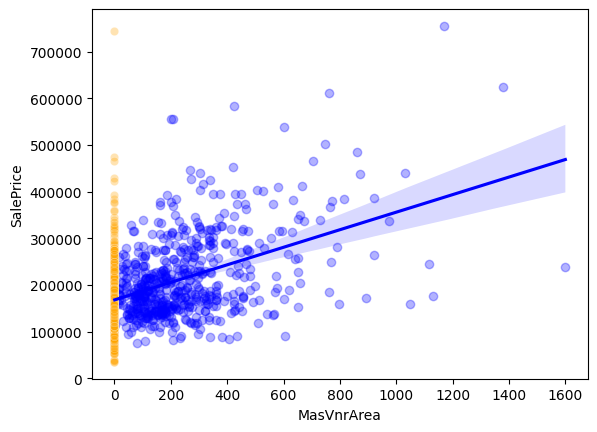

In [ ]:
#plotar uma linha de tendencia desconsiderando o valor 0
sns.regplot(x= 'MasVnrArea', y= 'SalePrice', data= df[df.MasVnrArea != 0], color= 'blue', scatter_kws={'alpha':0.3})
sns.scatterplot(x= 'MasVnrArea', y= 'SalePrice', data= df[df.MasVnrArea == 0], color= 'orange', alpha= 0.3)
plt.show()

Desconsiderando o valor 0, vimos que existe uma tendencia de alta do valor de casas de acordo com a Area.
</br>
Verificar como os materiais impactam neste valor, e se este impacto é maior que o impacto de area.

In [ ]:
#verificar relacao entre MasVnrType, MasVnrArea
df.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn    247.67
BrkFace   259.01
None        1.08
Stone     239.30
Name: MasVnrArea, dtype: float64

In [ ]:
#qual é a media total de MasVnrArea, desconsiderando os valores 0
df[df.MasVnrArea != 0]['MasVnrArea'].mean()

254.7394247038917

Grafico de MaxVnrArea com SalePrice

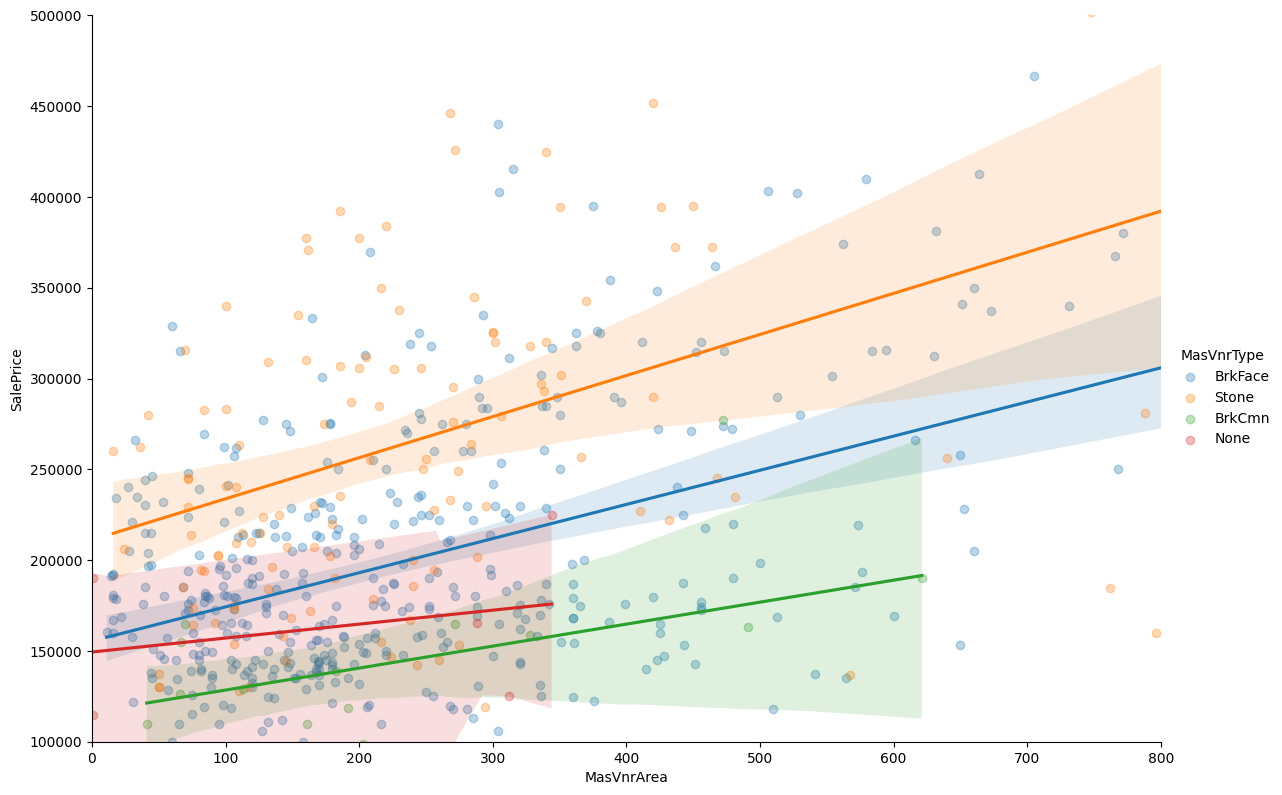

In [ ]:
sns.lmplot(x= 'MasVnrArea', y= 'SalePrice', hue= 'MasVnrType', data= df[df.MasVnrArea != 0], height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 800)
plt.ylim(100000, 500000)
plt.show()

In [ ]:
#dividir o salesprice de casa de stone por 239, de brkcmn por 247, e de brkface por 259, e ver o resultado
print('Stone =',df[df.MasVnrType == 'Stone']['SalePrice'].mean() / 239.31)
print('BrkCmn =',df[df.MasVnrType == 'BrkCmn']['SalePrice'].mean() / 247.67)
print('BrkFace =',df[df.MasVnrType == 'BrkFace']['SalePrice'].mean() / 259.01)
#para termos uma comparacao, tambem dividiremos None pela media de todos os dados, sendo este 254.74
print('None =',df[df.MasVnrType == 'None']['SalePrice'].mean() / 254.74)

Stone = 1109.789081108186
BrkCmn = 590.7783206147967
BrkFace = 790.2855948037233
None = 616.1507541778521


Atraves dos graficos, e posterior analise, chegamos a conclusao que os materiais tem sim um grande impacto no valor da residencia, e que não se trata apenas de casas maiores/menores de materiais diferentes, com esta informação, fizemos um Map de MasVnrType, consideramos o Material mais barato, BrkCmn, com o mesmo valor de None

In [ ]:
#map MasVnrType com N/A=0, BrkCmn=0, BrkFace=1, Stone=2
df['MasVnrType'] = df['MasVnrType'].map({'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})
df_test['MasVnrType'] = df_test['MasVnrType'].map({'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})

Tratamento de todas as variaveis Basement/Porao

BsmtQual: Evaluates the height of the basement

        Ex	Excellent (100+ inches)	
        Gd	Good (90-99 inches)
        TA	Typical (80-89 inches)
        Fa	Fair (70-79 inches)
        Po	Poor (<70 inches)
        NA	No Basement

In [ ]:
print_unique_values('BsmtQual', df, df_test, 'N/A')

Coluna BsmtQual preenchida com N/A em 37 entradas no dataset Treino sobrando 0 entradas nulas
Coluna BsmtQual preenchida com N/A em 44 entradas no dataset Teste sobrando 0 entradas nulas


,BsmtQual,Count,Price,Std,Area_Price,Std/Area
2,Ex,121,327041.04,113563.24,25.76,11.18
0,Gd,618,202688.48,58092.36,18.74,13.82
1,TA,649,140759.82,43483.27,14.05,9.36
4,Fa,35,115692.03,34469.67,13.91,5.09
3,N/A,37,105652.89,29278.69,11.37,4.11


BsmtCond: Evaluates the general condition of the basement

        Ex	Excellent
        Gd	Good
        TA	Typical - slight dampness allowed
        Fa	Fair - dampness or some cracking or settling
        Po	Poor - Severe cracking, settling, or wetness
        NA	No Basement

In [ ]:
print_unique_values('BsmtCond', df, df_test, 'N/A')

Coluna BsmtCond preenchida com N/A em 37 entradas no dataset Treino sobrando 0 entradas nulas
Coluna BsmtCond preenchida com N/A em 45 entradas no dataset Teste sobrando 0 entradas nulas


,BsmtCond,Count,Price,Std,Area_Price,Std/Area
1,Gd,65,213599.91,72663.16,19.07,11.38
0,TA,1311,183632.62,79515.39,17.37,12.59
3,Fa,45,121809.53,43467.80,13.53,6.38
2,N/A,37,105652.89,29278.69,11.37,4.11
4,Po,2,64000.00,4242.64,6.74,0.98


BsmtExposure: Refers to walkout or garden level walls

        Gd	Good Exposure
        Av	Average Exposure (split levels or foyers typically score average or above)	
        Mn	Mimimum Exposure
        No	No Exposure
        NA	No Basement

In [ ]:
print_unique_values('BsmtExposure', df, df_test)

Coluna BsmtExposure preenchida com N/A em 38 entradas no dataset Treino sobrando 0 entradas nulas
Coluna BsmtExposure preenchida com N/A em 44 entradas no dataset Teste sobrando 0 entradas nulas


,BsmtExposure,Count,Price,Std,Area_Price,Std/Area
1,Gd,134,257689.81,118923.67,13.39,14.40
3,Av,221,206643.42,88655.50,19.71,12.00
2,Mn,114,192789.66,77335.44,18.01,9.51
0,No,953,165652.30,60695.72,17.78,12.53
4,N/A,38,107938.34,32133.44,11.46,4.07


Rating of basement finished area. Applies to BsmtFinType1 and BsmtFinType2

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
print_unique_values('BsmtFinType1', df, df_test)

Coluna BsmtFinType1 preenchida com N/A em 37 entradas no dataset Treino sobrando 0 entradas nulas
Coluna BsmtFinType1 preenchida com N/A em 42 entradas no dataset Teste sobrando 0 entradas nulas


,BsmtFinType1,Count,Price,Std,Area_Price,Std/Area
0,GLQ,418,235413.72,93215.61,21.94,13.45
2,Unf,430,170670.58,72577.08,17.84,11.06
1,ALQ,220,161573.07,50821.28,13.95,13.86
6,LwQ,74,151852.70,50796.99,15.85,10.50
4,BLQ,148,149493.66,47327.29,13.75,10.40
3,Rec,133,146889.25,45190.12,12.63,6.27
5,N/A,37,105652.89,29278.69,11.37,4.11


In [ ]:
print_unique_values('BsmtFinType2', df, df_test)

Coluna BsmtFinType2 preenchida com N/A em 38 entradas no dataset Treino sobrando 0 entradas nulas
Coluna BsmtFinType2 preenchida com N/A em 42 entradas no dataset Teste sobrando 0 entradas nulas


,BsmtFinType2,Count,Price,Std,Area_Price,Std/Area
3,ALQ,19,209942.11,104764.74,17.43,7.76
0,Unf,1256,184694.69,81275.31,18.11,12.69
6,GLQ,14,180982.14,64573.04,17.17,18.82
4,Rec,54,164917.13,59183.28,10.28,9.93
5,LwQ,46,164364.13,43255.04,15.81,6.86
1,BLQ,33,151101.00,41611.31,10.59,5.71
2,N/A,38,110346.24,40879.31,11.83,4.70


Verificar se existe relação e se podemos excluir alguma das colunas, BsmtCond, BsmtExposure e BsmtQual

In [ ]:
#print relacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice, individualmente, com sort values descending
print(df.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtCond')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtExposure')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtFinType2')['SalePrice'].mean().sort_values(ascending= False))


BsmtQual
Ex    327041.04
Gd    202688.48
TA    140759.82
Fa    115692.03
N/A   105652.89
Name: SalePrice, dtype: float64
BsmtCond
Gd    213599.91
TA    183632.62
Fa    121809.53
N/A   105652.89
Po     64000.00
Name: SalePrice, dtype: float64
BsmtExposure
Gd    257689.81
Av    206643.42
Mn    192789.66
No    165652.30
N/A   107938.34
Name: SalePrice, dtype: float64
BsmtFinType1
GLQ   235413.72
Unf   170670.58
ALQ   161573.07
LwQ   151852.70
BLQ   149493.66
Rec   146889.25
N/A   105652.89
Name: SalePrice, dtype: float64
BsmtFinType2
ALQ   209942.11
Unf   184694.69
GLQ   180982.14
Rec   164917.13
LwQ   164364.13
BLQ   151101.00
N/A   110346.24
Name: SalePrice, dtype: float64


Através da analise acima, notamos que, no geral, a Qualidade tem muito mais peso do que o Exposure, porém, acreditamos que o modelo va calcular isto automaticamente.

In [ ]:
df.groupby(['BsmtQual', 'BsmtExposure'])['SalePrice'].mean()

BsmtQual  BsmtExposure
Ex        Av             323434.57
          Gd             393960.94
          Mn             294542.00
          No             283865.26
Fa        Gd              61000.00
          Mn             120260.00
          No             116790.38
Gd        Av             200928.39
          Gd             225753.07
          Mn             213302.63
          N/A            192500.00
          No             197349.15
N/A       N/A            105652.89
TA        Av             141620.67
          Gd             183260.00
          Mn             156684.80
          No             136829.82
Name: SalePrice, dtype: float64

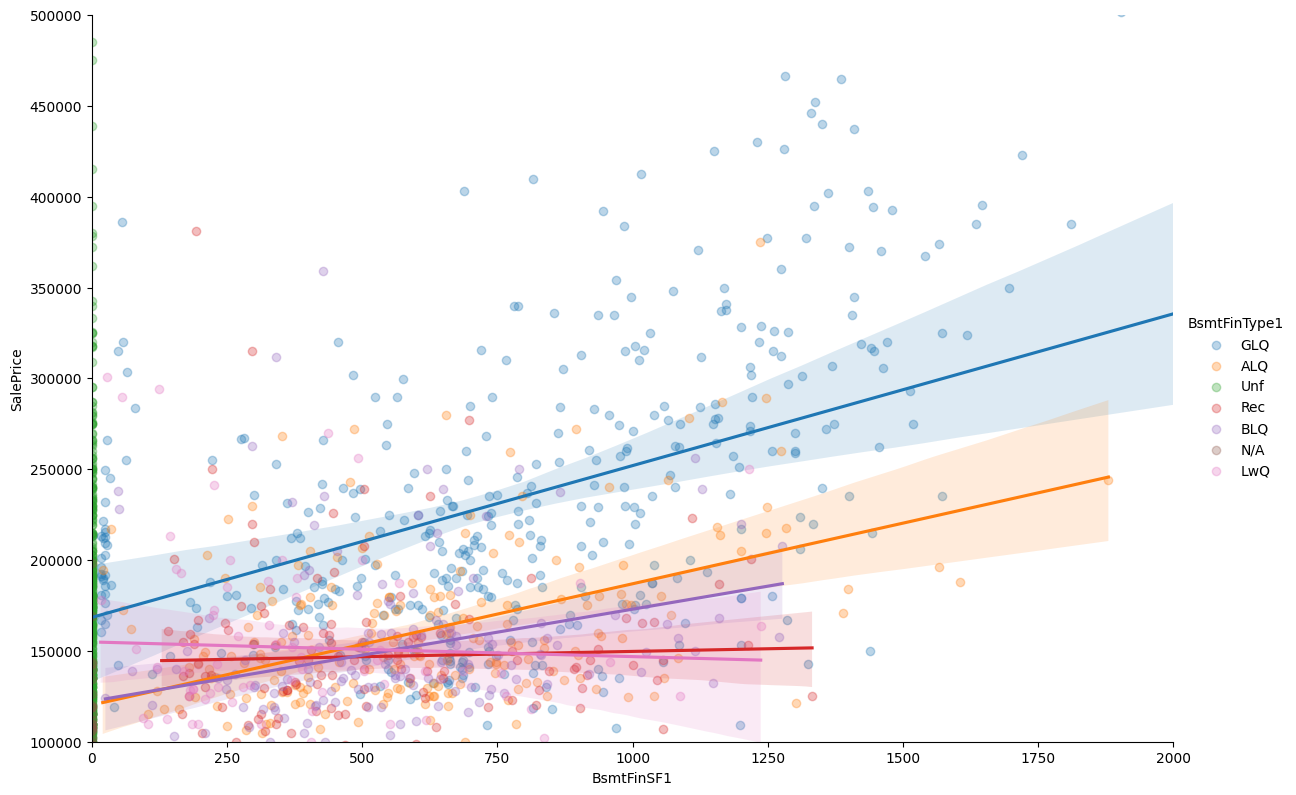

In [ ]:
#grafico scatter plot de BsmtFinSF1 e SalePrice, com hue de BsmtFinType1, e linha de tendencia

sns.lmplot(x= 'BsmtFinSF1', y= 'SalePrice', hue= 'BsmtFinType1', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2000)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Casas com porao GLQ, ALQ e BLQ tem valor de mercado maior, sendo que quanto maior a area, maior o valor

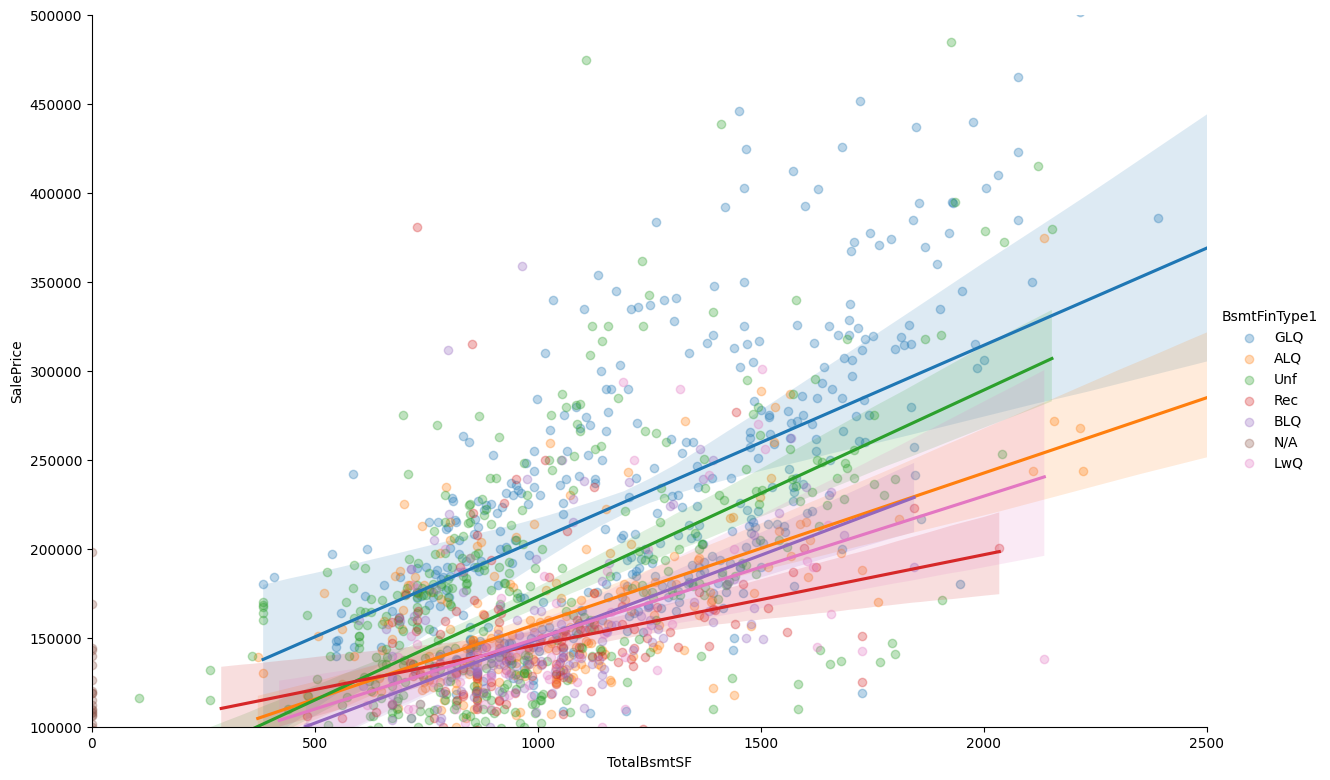

In [ ]:
#grafico scatter plot de TotalBsmtSF e SalePrice, com hue de BsmtFinType1, e linha de tendencia

sns.lmplot(x= 'TotalBsmtSF', y= 'SalePrice', hue= 'BsmtFinType1', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2500)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Existem casas com type 1 unfinished, e type 2. Isto significa que não podemos eliminar nenhuma das variaveis sem utilizar tratamentos avançados.

Alguns materias tem valor significativamente superior aos outros considerando a area, nesse caso, o GLQ, o ALQ, e o BLQ, os demais tem valor semelhante indeferentemente da area construida.</br>
Por esta razao, decidimos dar as variaveis LwQ, Rec, o mesmo valor no map.

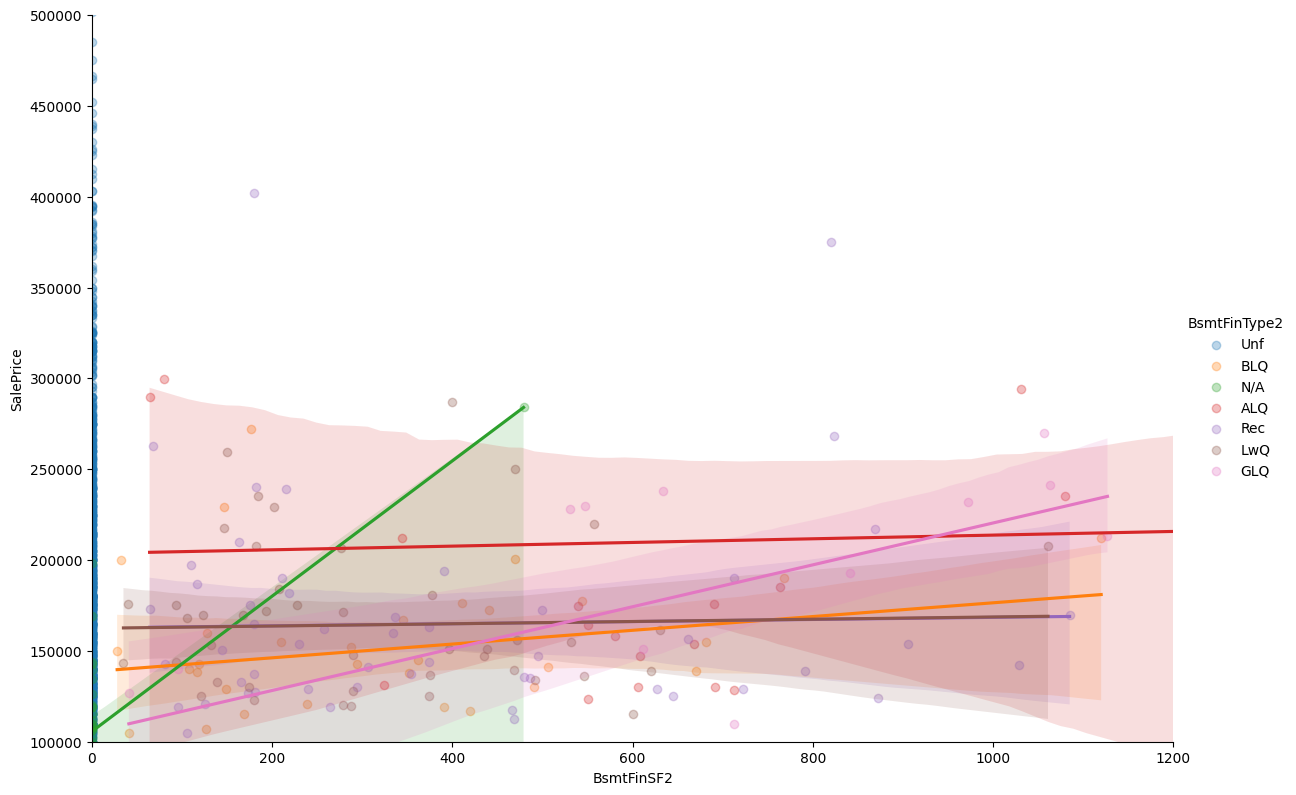

In [ ]:
#plotar o mesmo grafico com BsmtFinSF2
sns.lmplot(x= 'BsmtFinSF2', y= 'SalePrice', hue= 'BsmtFinType2', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 1200)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Algumas casas nao tem um segundo porao, mas tem area finalizada de segundo porão. Inconsistencia no dataset!? </br>
Vale a pena levar em conta apenas um material, e utilizar apenas a area total?

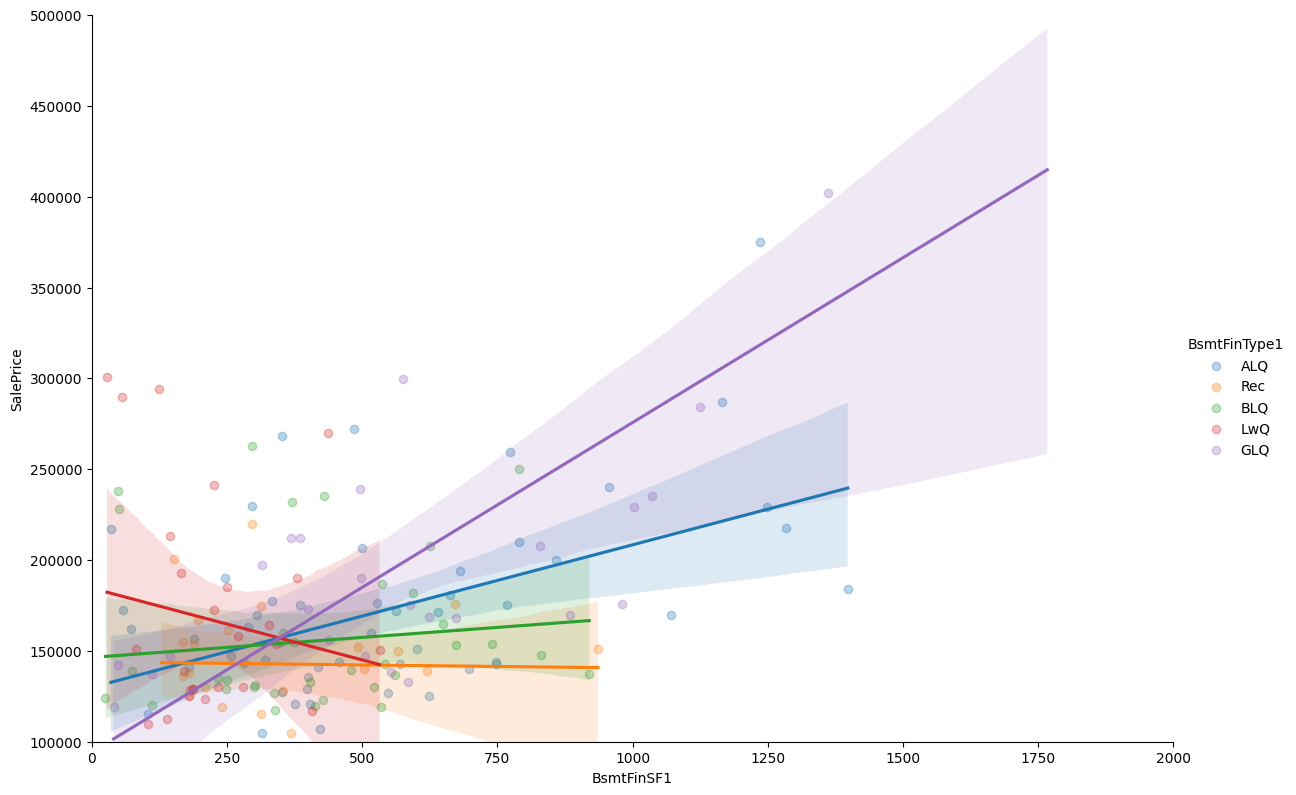

In [ ]:
#grafico analisando o BsmtFinType1 apenas de casas com BsmtFinSf2 > 0
sns.lmplot(x= 'BsmtFinSF1', y= 'SalePrice', hue= 'BsmtFinType1', data= df[df.BsmtFinSF2 > 0], height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2000)
plt.ylim(100000, 500000)
plt.show()

Através das analises acima, chegamos na conclusao que ter um segundo porão afeta significativamente o preço da casa, Ter uma area para um segundo porao tambem afetam significamente o preço, mesmo q este nao esteja construido.Tambem chegamos a conclusao q podemos considerar Unfinished e N/A com o mesmo valor na criação de um MAP.

In [ ]:
#map BsmtQual, BsmtCond, BsmtExposure, area1, area2, apenas em df
df['BsmtQual'] = df['BsmtQual'].map({'N/A': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df['BsmtCond'] = df['BsmtCond'].map({'N/A': 1, 'Po': 0, 'Fa': 2, 'TA': 3, 'Gd': 4})
df['BsmtExposure'] = df['BsmtExposure'].map({'N/A': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})

#map BsmtQual, BsmtCond, BsmtExposure, apenas em df_test
df_test['BsmtQual'] = df_test['BsmtQual'].map({'N/A': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df_test['BsmtCond'] = df_test['BsmtCond'].map({'N/A': 1, 'Po': 0, 'Fa': 2, 'TA': 3, 'Gd': 4})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'N/A': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})

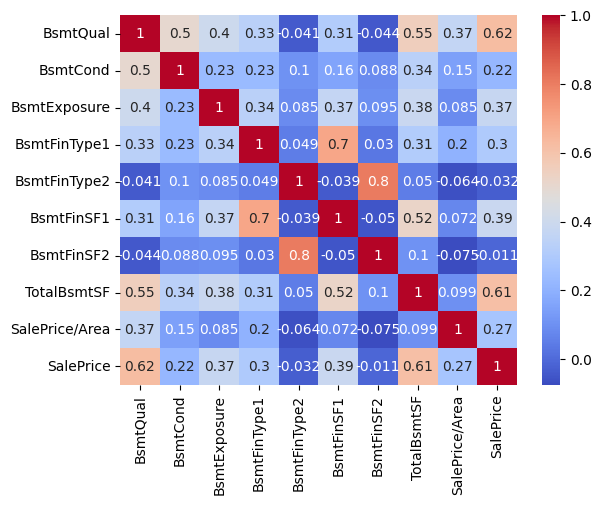

In [ ]:
# #heatmap para verificar a correlacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice
sns.heatmap(df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2','TotalBsmtSF', 'SalePrice/Area', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

In [ ]:
#agora, podemos dropar TotalBsmtSF
df = df.drop(columns= 'TotalBsmtSF')
df_test = df_test.drop(columns= 'TotalBsmtSF')
remove_cols.add('TotalBsmtSF')

GARAGE

In [ ]:
#value counts de GarageType
print_unique_values('GarageType', df, df_test)

Coluna GarageType preenchida com N/A em 81 entradas no dataset Treino sobrando 0 entradas nulas
Coluna GarageType preenchida com N/A em 76 entradas no dataset Teste sobrando 0 entradas nulas


,GarageType,Count,Price,Std,Area_Price,Std/Area
2,BuiltIn,88,254751.74,102230.85,21.24,12.11
0,Attchd,870,202892.66,77146.62,17.60,11.60
5,Basment,19,160570.68,63967.28,15.39,10.58
6,2Types,6,151283.33,34917.07,8.77,7.16
1,Detchd,387,134091.16,41391.55,15.92,14.06
3,CarPort,9,109962.11,24638.18,9.42,1.77
4,N/A,81,103317.28,32815.02,13.83,11.36


In [ ]:
#value counts de GarageFinish
print_unique_values('GarageFinish', df, df_test)

Coluna GarageFinish preenchida com N/A em 81 entradas no dataset Treino sobrando 0 entradas nulas
Coluna GarageFinish preenchida com N/A em 78 entradas no dataset Teste sobrando 0 entradas nulas


,GarageFinish,Count,Price,Std,Area_Price,Std/Area
2,Fin,352,240052.69,96960.59,19.46,13.48
0,RFn,422,202068.87,63536.22,18.81,9.75
1,Unf,605,142156.42,46498.53,14.64,12.73
3,N/A,81,103317.28,32815.02,13.83,11.36


In [ ]:
#value counts de GarageQual
print_unique_values('GarageQual', df, df_test)

Coluna GarageQual preenchida com N/A em 81 entradas no dataset Treino sobrando 0 entradas nulas
Coluna GarageQual preenchida com N/A em 78 entradas no dataset Teste sobrando 0 entradas nulas


,GarageQual,Count,Price,Std,Area_Price,Std/Area
4,Ex,3,241000.00,202680.17,18.56,3.34
2,Gd,14,215860.71,74126.74,19.38,8.67
0,TA,1311,187489.84,78774.95,17.45,12.53
1,Fa,48,123573.35,42971.44,13.50,8.68
3,N/A,81,103317.28,32815.02,13.83,11.36
5,Po,3,100166.67,35143.75,10.47,3.95


In [ ]:
#value counts de GarageCond
print_unique_values('GarageCond', df, df_test)

Coluna GarageCond preenchida com N/A em 81 entradas no dataset Treino sobrando 0 entradas nulas
Coluna GarageCond preenchida com N/A em 78 entradas no dataset Teste sobrando 0 entradas nulas


,GarageCond,Count,Price,Std,Area_Price,Std/Area
0,TA,1326,187885.74,79103.32,17.46,12.47
3,Gd,9,179930.00,64769.32,18.51,5.42
5,Ex,2,124000.00,4949.75,15.50,2.44
1,Fa,35,114654.03,36420.90,12.80,9.99
4,Po,7,108500.00,22662.38,11.92,2.74
2,N/A,81,103317.28,32815.02,13.83,11.36


In [ ]:
print_unique_values('GarageYrBlt', df, df_test)

Coluna GarageYrBlt preenchida com 0 em 81 entradas no dataset Treino sobrando 0 entradas nulas
Coluna GarageYrBlt preenchida com 0 em 78 entradas no dataset Teste sobrando 0 entradas nulas


,GarageYrBlt,Count,Price,Std,Area_Price,Std/Area
82,2010.00,3,337874.67,98619.09,36.30,2.33
23,2008.00,29,306569.03,94072.24,24.53,11.59
49,2009.00,21,306111.00,136777.61,30.08,11.28
13,2006.00,59,262001.34,79040.75,24.08,11.58
75,1994.00,18,258100.00,148015.11,18.04,8.53
...,...,...,...,...,...,...
83,1927.00,1,115000.00,NaN,12.83,NaN
25,1920.00,14,109992.86,56658.78,13.02,6.77
31,0.00,81,103317.28,32815.02,13.83,11.36
88,1952.00,3,101331.00,39267.04,13.38,6.73


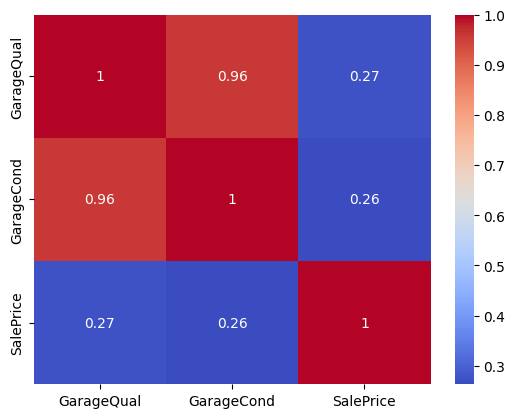

In [ ]:
#map garage qual e cond
df['GarageQual'] = df['GarageQual'].map({'N/A': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['GarageCond'] = df['GarageCond'].map({'N/A': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

#heatmap para verificar a correlacao entre GarageQual, GarageCond e SalePrice
sns.heatmap(df[['GarageQual', 'GarageCond', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

Drop Garage Cond

In [ ]:
#drop garage Cond
df = df.drop(columns= 'GarageCond')
df_test = df_test.drop(columns= 'GarageCond')
remove_cols.add('GarageCond')

In [ ]:
#relacao de garage finish e garage type
df.groupby(['GarageType', 'GarageFinish'])['SalePrice'].mean()

GarageType  GarageFinish
2Types      Fin            168000.00
            RFn            168350.00
            Unf            134333.33
Attchd      Fin            240705.99
            RFn            202998.99
            Unf            156669.10
Basment     Fin            163250.00
            RFn            157416.67
            Unf            161482.56
BuiltIn     Fin            266396.19
            RFn            244449.08
            Unf            166800.00
CarPort     Unf            109962.11
Detchd      Fin            143338.00
            RFn            148024.26
            Unf            132977.65
N/A         N/A            103317.28
Name: SalePrice, dtype: float64

Notamos que o estado da garagem(construido, quase terminado, ou inacabado) afeta significativamente o preço da casa.

O tipo de garagem também afeta, mas é menos "importante" em questão de impacto que seu estado. Acreditamos que o modelo conseguira avaliar isto.

In [ ]:
#garagetype map
df['GarageType'] = df['GarageType'].map({'N/A': 0, 'CarPort': 0, 'Detchd': 1, 'Basment': 2, '2Types': 2, 'Attchd': 3, 'BuiltIn': 4})
df_test['GarageType'] = df_test['GarageType'].map({'N/A': 0, 'CarPort': 0, 'Detchd': 1, 'Basment': 2, '2Types': 2, 'Attchd': 3, 'BuiltIn': 4})

#garage finish map
df['GarageFinish'] = df['GarageFinish'].map({'N/A': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df_test['GarageFinish'] = df_test['GarageFinish'].map({'N/A': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})


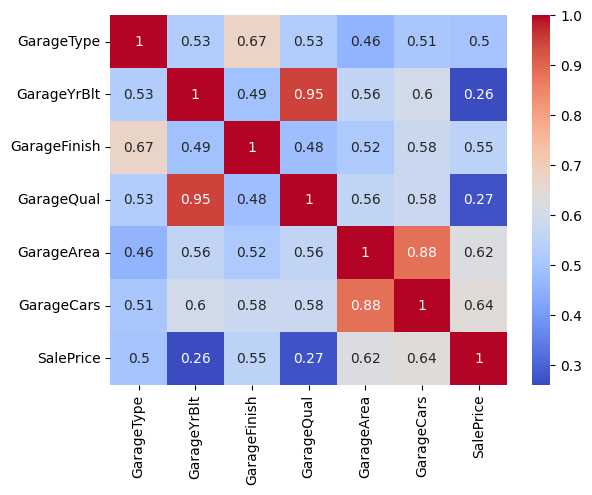

In [ ]:
#heatmap tudo sobre garagem
sns.heatmap(df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageArea', 'GarageCars', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

<Axes: ylabel='Frequency'>

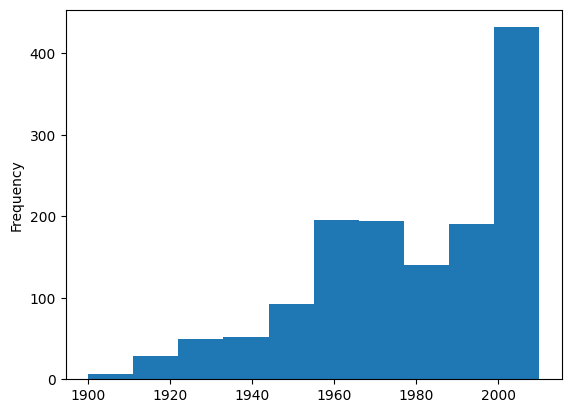

In [ ]:
#distribuicao de garageyrblt, considerando apenas os valores maiores que 0
df[df.GarageYrBlt > 0]['GarageYrBlt'].plot.hist()

Tambem notamos uma correlacao gigantesca com a area/quantidade de carros, e com a Qualidade/Ano de construcao. Por isto, resolvemos remover o YrBuilt, e a Quantidade de carros, visto que estes são dados menos significativos/com menor spread para o modelo.

In [ ]:
#drop garageQual e garageCars
df = df.drop(columns= 'GarageYrBlt')
df_test = df_test.drop(columns= 'GarageYrBlt')
remove_cols.add('GarageYrBlt')

df = df.drop(columns= 'GarageCars')
df_test = df_test.drop(columns= 'GarageCars')
remove_cols.add('GarageCars')

LOT

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [ ]:
#LotShape value counts
print_unique_values('LotShape', df, df_test, other_cols=['LotArea'])

Coluna LotShape preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna LotShape preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,LotShape,Count,Price,Std,Area_Price,Std/Area,LotArea
2,IR2,41,239833.37,99669.43,10.11,10.25,23733.66
3,IR3,10,216036.50,82540.33,5.23,5.49,41338.20
1,IR1,484,206101.67,85858.49,17.33,9.02,11894.55
0,Reg,925,164754.82,69673.43,18.56,13.81,8876.92


LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [ ]:
#LotConfig value counts
print_unique_values('LotConfig', df, df_test, other_cols=['LotArea'])

Coluna LotConfig preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna LotConfig preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,LotConfig,Count,Price,Std,Area_Price,Std/Area,LotArea
3,CulDSac,94,223854.62,93117.55,12.91,9.00,17342.05
4,FR3,4,208475.00,78379.22,23.95,14.07,8706.25
2,Corner,263,181623.43,84466.04,15.90,8.29,11426.23
1,FR2,47,177934.57,62788.93,17.11,13.36,10398.28
0,Inside,1052,176938.05,76426.81,18.26,13.25,9691.80


Inicialmente, O dataframe engana. Isso ocorre porque lotes irregulares tem valores maiores do que regulares, porém, isto ocorre porque eles sao consideravelmente maiores.

In [ ]:
#map LotShape, com IR3 = 0, IR2 = 1, IR1 = 2, Reg = 3
df['LotShape'] = df['LotShape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})
df_test['LotShape'] = df_test['LotShape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

O mesmo ocorre com LotConfig. Porem, fica um pouco mais dificil de avaliar, visto que neste caso, inumeras outras variaveis afetam os dados. Decidimos entao fazer um OneHotEnconding apos unir FR2 e FR3.

In [ ]:
#Fr2 e Fr3 viram Fr23
df.loc[df.LotConfig == 'FR2', 'LotConfig'] = 'FR23'
df.loc[df.LotConfig == 'FR3', 'LotConfig'] = 'FR23'

df_test.loc[df_test.LotConfig == 'FR2', 'LotConfig'] = 'FR23'
df_test.loc[df_test.LotConfig == 'FR3', 'LotConfig'] = 'FR23'

In [ ]:
#onehotenconding de lotconfig
df = pd.get_dummies(df, columns= ['LotConfig'], drop_first= True)
df_test = pd.get_dummies(df_test, columns= ['LotConfig'], drop_first= True)

In [ ]:
#street value counts
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Dropamos Street pois nao é significativo

In [ ]:
#drop Street
df = df.drop(columns= 'Street')
df_test = df_test.drop(columns= 'Street')
remove_cols.add('Street')

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [ ]:
#LandSlope value counts
print_unique_values('LandSlope', df, df_test, other_cols=['LotArea'])

Coluna LandSlope preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna LandSlope preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,LandSlope,Count,Price,Std,Area_Price,Std/Area,LotArea
2,Sev,13,204379.23,86729.92,3.03,5.29,67401.92
1,Mod,65,196734.14,92375.36,13.29,13.06,14799.42
0,Gtl,1382,179956.80,78669.37,18.40,12.31,9780.31


LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [ ]:
#LandContour value counts
print_unique_values('LandContour', df, df_test, other_cols=['LotArea'])

Coluna LandContour preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna LandContour preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,LandContour,Count,Price,Std,Area_Price,Std/Area,LotArea
3,HLS,50,231533.94,101790.14,15.17,15.24,15264.64
2,Low,36,203661.11,83935.35,6.16,9.21,33075.25
0,Lvl,1311,180183.75,78463.57,18.67,12.41,9652.86
1,Bnk,63,143104.08,49361.24,12.09,6.30,11836.89


In [ ]:
#map LandSlope
df['LandSlope'] = df['LandSlope'].map({'Sev': 0, 'Mod': 1, 'Gtl': 2})

#map LandContour
df['LandContour'] = df['LandContour'].map({'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3})

In [ ]:
#Relacao entre LandContour com SAlesprice/Area
df.groupby('LandContour')['SalePrice'].mean() / df.groupby('LandContour')['LotArea'].mean()

LandContour
0    6.16
1   15.17
2   12.09
3   18.67
dtype: float64

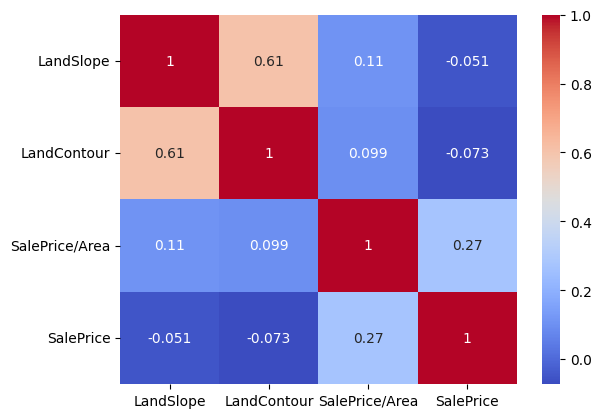

In [ ]:
#heatmap LandSlope e LandContour
sns.heatmap(df[['LandSlope', 'LandContour', 'SalePrice/Area', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

LandSlope e LandContour não tem relacao significativa com SalesPrice.

O problema aqui é que elas estão altamente relacionadas quando levamos em conta o SalePrice/Area

Dito isto, resolvemos fazer o MAP, mantendo os valores de acordo com sua definicao.

In [ ]:
#Neighborhood count
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Neighborhood: Physical locations within Ames city limits

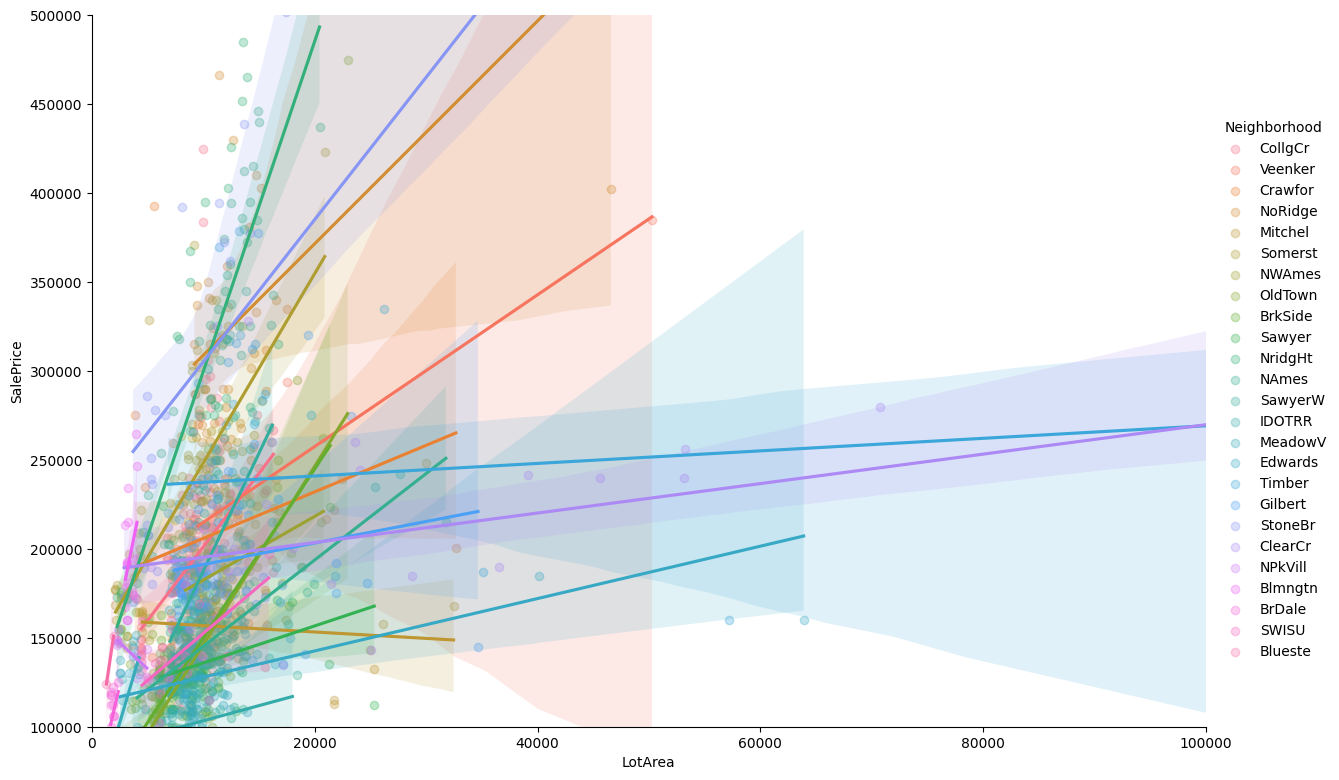

In [ ]:
sns.lmplot(x= 'LotArea', y= 'SalePrice', hue= 'Neighborhood', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 100000)
plt.ylim(100000, 500000)
plt.show()

Algumas vizinhanças tem preços caros considerando o tamanho do lote, outras tem preços caros no geral. Utilizar OneHotEnconding é inviavel, visto que são 25 vizinhanças, e em caso de irmos para produção, teriamos ainda mais vizinhanças no futuro. Por isso, criaremos 4 novas categorias.

        Local Caro em Preço Nominal e Preço/Area - CpCa
        Local Caro em Preço Nominal e Barato em Preco/Area -  CpBa
        Local Barato em Preço Nominal e Caro em Preco/Area - BpCa
        Local Barato em Preco Nominal e Preco/Area - BpCa

In [ ]:
#media de preços do dataset
df.SalePrice.mean()

180921.19589041095

In [ ]:
#media de preco/area do dataset
df.SalePrice.mean() / df.LotArea.mean()

17.20301924463005

In [ ]:
#criar variavel aux contendo bairros com media de preco/area acima da media do dataset
aux = df.groupby('Neighborhood')['SalePrice'].mean() / df.groupby('Neighborhood')['LotArea'].mean() > df.SalePrice.mean() / df.LotArea.mean()
#criar variavel aux contendo bairros com media de preco acima da media do dataset
aux2 = df.groupby('Neighborhood')['SalePrice'].mean() > df.SalePrice.mean()
#criar variavel com todos os bairros
aux3 = df.Neighborhood.unique()
#listar bairros que aparecem nas duas variaveis aux
CpCa = aux3[aux & aux2]
#listar bairros que aparecem em aux2 e nao em aux
CpBa = aux3[~aux & aux2]
#listar bairros que aparecem em aux e nao em aux2
BpCa = aux3[aux & ~aux2]
#listar bairros que nao aparecem em nenhuma das duas variaveis aux
BpBa = aux3[~aux & ~aux2]

In [ ]:
#transformar valores dentro de Neighborhood em CpCa, CpBa, BpCa, BpBa, verificando se o valor da coluna se encontra dentro das variaveis aux
df['Neighborhood'] = np.where(df['Neighborhood'].isin(CpCa), 'CpCa', df['Neighborhood'])
df['Neighborhood'] = np.where(df['Neighborhood'].isin(CpBa), 'CpBa', df['Neighborhood'])
df['Neighborhood'] = np.where(df['Neighborhood'].isin(BpCa), 'BpCa', df['Neighborhood'])
df['Neighborhood'] = np.where(df['Neighborhood'].isin(BpBa), 'BpBa', df['Neighborhood'])

df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(CpCa), 'CpCa', df_test['Neighborhood'])
df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(CpBa), 'CpBa', df_test['Neighborhood'])
df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(BpCa), 'BpCa', df_test['Neighborhood'])
df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(BpBa), 'BpBa', df_test['Neighborhood'])

In [ ]:
#list
df.Neighborhood.value_counts()

BpBa    619
CpCa    489
BpCa    201
CpBa    151
Name: Neighborhood, dtype: int64

In [ ]:
#Verificar a relacao entre Neighborhood e SalePrice
df.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
BpBa   166993.51
BpCa   244717.68
CpBa   135186.72
CpCa   186450.95
Name: SalePrice, dtype: float64

In [ ]:
#verificar a relacao entre Neighborhood e SalePrice/Area
df.groupby('Neighborhood')['SalePrice'].mean() / df.groupby('Neighborhood')['LotArea'].mean()

Neighborhood
BpBa   14.95
BpCa   22.57
CpBa   16.43
CpCa   18.17
dtype: float64

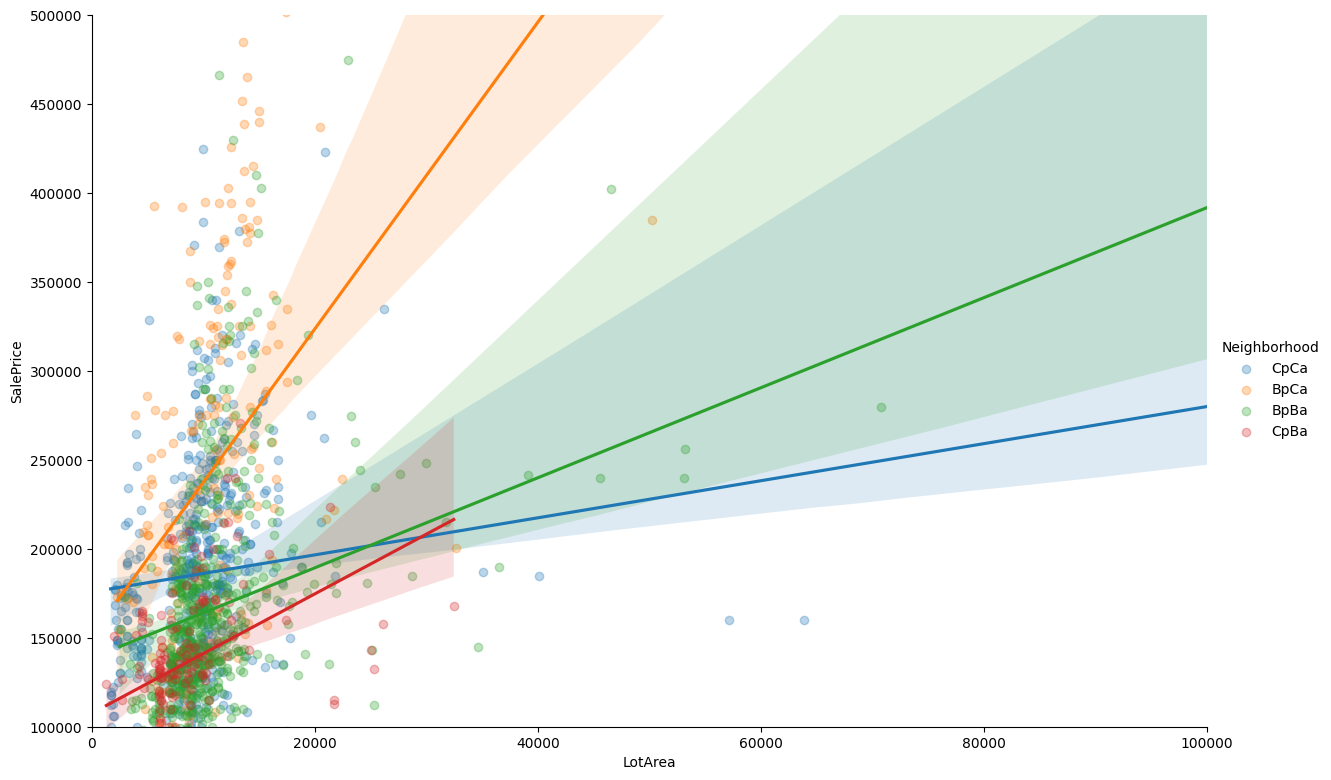

In [ ]:
#scatterplot de SalesPrice e SalesPrice/Area, com hue de Neighborhood
sns.lmplot(x= 'LotArea', y= 'SalePrice', hue= 'Neighborhood', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 100000)
plt.ylim(100000, 500000)
plt.show()

In [ ]:
#get dummies de Neighborhood
df = pd.get_dummies(df, columns= ['Neighborhood'], drop_first= True)
df_test = pd.get_dummies(df_test, columns= ['Neighborhood'], drop_first= True)


Condition1&2: Proximity to various conditions

In [ ]:
#verificar Condition1 e 2
print_unique_values('Condition1', df, df_test)

Coluna Condition1 preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Condition1 preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Condition1,Count,Price,Std,Area_Price,Std/Area
7,PosA,8,225875.00,52348.93,13.60,4.83
2,PosN,19,215184.21,65256.54,16.90,5.83
5,RRNn,5,212400.00,93823.24,23.48,6.26
8,RRNe,2,190750.00,5303.30,20.35,0.32
0,Norm,1260,184495.49,81256.98,17.71,12.96
6,RRAn,26,184396.62,66177.92,15.39,5.25
1,Feedr,81,142475.48,42157.29,13.28,4.95
4,RRAe,11,138400.00,24030.81,11.82,2.50
3,Artery,48,135091.67,66226.66,13.51,4.54


In [ ]:
print_unique_values('Condition2', df, df_test)

Coluna Condition2 preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Condition2 preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Condition2,Count,Price,Std,Area_Price,Std/Area
5,PosA,1,325000.00,NaN,24.07,NaN
4,PosN,2,284875.00,141598.13,10.38,15.13
7,RRAe,1,190000.00,NaN,10.06,NaN
0,Norm,1445,181169.41,79337.74,17.26,12.42
6,RRAn,1,136905.00,NaN,11.90,NaN
3,Feedr,6,121166.67,33544.99,13.75,4.46
1,Artery,2,106500.00,16263.46,11.81,4.92
2,RRNn,2,96750.00,39951.53,13.29,3.07


In [ ]:
#verificar dados que tenha condition1 e 2 iguais, sem que seja norm, mostrar apenas SalesPrice, Area, Condition1 e Condition2
df[(df.Condition2 != 'Norm') & (df.Condition1 != 'Norm')][['SalePrice', 'LotArea', 'Condition1', 'Condition2']]

,SalePrice,LotArea,Condition1,Condition2
Id,,,,
10,118000,7420,Artery,Artery
30,68500,6324,Feedr,RRNn
64,140000,10300,RRAn,Feedr
89,85000,8470,Feedr,Feedr
185,127000,7438,RRAn,Feedr
524,184750,40094,PosN,PosN
532,128000,6155,RRNn,Feedr
549,125000,8235,Feedr,RRNn
584,325000,13500,Artery,PosA


Decidimos por drop em Condition2

In [ ]:
#dropar condition2
df = df.drop(columns= 'Condition2')
df_test = df_test.drop(columns= 'Condition2')
remove_cols.add('Condition2')

        Artery    135091.666667
        Feedr     142475.481481
        Norm      184495.492063
        PosA      225875.000000
        PosN      215184.210526
        RRAe      138400.000000
        RRAn      184396.615385
        RRNe      190750.000000
        RRNn      212400.000000

In [ ]:
#map condition 1, agrupando categorias com valores proximos
df['Condition1'] = df['Condition1'].map({'Norm': 1, 'Feedr': 0, 'Artery': 0, 'RRAn': 1, 'RRAe': 1, 'RRNn': 2, 'RRNe': 0, 'PosN': 2, 'PosA': 2})
df_test['Condition1'] = df_test['Condition1'].map({'Norm': 1, 'Feedr': 0, 'Artery': 0, 'RRAn': 1, 'RRAe': 1, 'RRNn': 2, 'RRNe': 0, 'PosN': 2, 'PosA': 2})

In [ ]:
#pavedDrive value counts
print_unique_values('PavedDrive', df, df_test)

Coluna PavedDrive preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna PavedDrive preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,PavedDrive,Count,Price,Std,Area_Price,Std/Area
0,Y,1340,186433.97,79665.50,17.67,12.57
2,P,30,132330.00,33503.03,11.63,6.95
1,N,90,115039.12,44352.52,11.78,7.01


In [ ]:
#map PavedDrive
df['PavedDrive'] = df['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})
df_test['PavedDrive'] = df_test['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})

Dwelling - HoyseStyle + BldgType

In [ ]:
#HouseStyle
print_unique_values('HouseStyle', df, df_test, other_cols=['LotArea'])

Coluna HouseStyle preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna HouseStyle preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,HouseStyle,Count,Price,Std,Area_Price,Std/Area,LotArea
7,2.5Fin,8,220000.00,118211.98,17.64,2.87,12468.12
0,2Story,445,210051.76,87339.21,20.34,15.12,10325.17
1,1Story,726,175985.48,77055.72,16.53,11.11,10644.41
5,SLvl,65,166703.38,38305.16,15.82,7.32,10537.74
6,2.5Unf,11,157354.55,63934.13,17.19,4.07,9153.27
2,1.5Fin,154,143116.74,54277.94,12.50,6.07,11448.62
4,SFoyer,37,135074.49,30480.90,17.60,14.04,7672.84
3,1.5Unf,14,110150.00,19036.47,15.47,3.91,7118.71


Resolvemos agrupar casas que tenham variaveis de preço e Area_price parecidos para o map.

In [ ]:
#2.5Fin = 2Story
df.loc[df.HouseStyle == '2.5Fin', 'HouseStyle'] = '2Story'
df_test.loc[df_test.HouseStyle == '2.5Fin', 'HouseStyle'] = '2Story'
#SLvl e 2.5Unf = 1Story
df.loc[df.HouseStyle == 'SLvl', 'HouseStyle'] = '1Story'
df_test.loc[df_test.HouseStyle == 'SLvl', 'HouseStyle'] = '1Story'
#SFoyer = 1.5Fin
df.loc[df.HouseStyle == 'SFoyer', 'HouseStyle'] = '1.5Fin'
df_test.loc[df_test.HouseStyle == 'SFoyer', 'HouseStyle'] = '1.5Fin'

In [ ]:
#map HouseStyle
df['HouseStyle'] = df['HouseStyle'].map({'1.5Unf': 0, '1.5Fin': 1, '2.5Unf': 2, '1Story': 3, '2Story': 4})
df_test['HouseStyle'] = df_test['HouseStyle'].map({'1.5Unf': 0, '1.5Fin': 1, '2.5Unf': 2, '1Story': 3, '2Story': 4})

In [ ]:
print_unique_values('BldgType', df, df_test, other_cols=['LotArea'])

Coluna BldgType preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna BldgType preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,BldgType,Count,Price,Std,Area_Price,Std/Area,LotArea
0,1Fam,1220,185763.81,82648.50,16.53,7.00,11240.63
3,TwnhsE,114,181959.34,60626.11,38.17,14.90,4766.61
4,Twnhs,43,135911.63,41013.22,56.84,12.38,2391.21
2,Duplex,52,133541.08,27833.25,13.74,4.44,9720.06
1,2fmCon,31,128432.26,35458.55,8.14,5.50,15785.06


As casas TwnhsE e TwnhsI sao super caras na relação Preço/Area. Elas apresentam um Preço final baixo, mas podem ser considerados mais relevantes ao resultado. Por isto, fazemos um map da seguinte maneira:

In [ ]:
#map BldgType
df['BldgType'] = df['BldgType'].map({'Twnhs': 3, 'TwnhsE': 2, 'Duplex': 0, '2fmCon': 0, '1Fam': 1})
df_test['BldgType'] = df_test['BldgType'].map({'Twnhs': 3, 'TwnhsE': 2, 'Duplex': 0, '2fmCon': 0, '1Fam': 1})

Utilities

In [ ]:
#Utilities
print_unique_values('Utilities', df, df_test)

Coluna Utilities preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Utilities preenchida com N/A em 2 entradas no dataset Teste sobrando 0 entradas nulas


,Utilities,Count,Price,Std,Area_Price,Std/Area
0,AllPub,1459,180950.96,79461.60,17.21,12.39
1,NoSeWa,1,137500.00,NaN,9.57,NaN


In [ ]:
#Drop Utilities
df = df.drop(columns= 'Utilities')
df_test = df_test.drop(columns= 'Utilities')
remove_cols.add('Utilities')

OverallQual + OverallCond

In [ ]:
#OverallQual
print_unique_values('OverallQual', df, df_test)

Coluna OverallQual preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna OverallQual preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,OverallQual,Count,Price,Std,Area_Price,Std/Area
6,10,18,438588.39,159785.49,22.07,11.35
4,9,43,367513.02,81278.17,27.38,9.58
2,8,168,274735.54,63898.90,24.74,11.56
0,7,319,207716.42,44466.26,18.75,13.07
1,6,374,161603.03,36090.18,16.12,13.53
3,5,397,133523.35,27107.33,13.15,7.70
5,4,116,108420.66,29022.00,12.16,11.23
7,3,20,87473.75,24688.57,10.47,4.71
9,2,3,51770.33,14254.20,6.60,2.94
8,1,2,50150.00,15344.22,6.68,1.25


In [ ]:
print_unique_values('OverallCond', df, df_test)

Coluna OverallCond preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna OverallCond preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,OverallCond,Count,Price,Std,Area_Price,Std/Area
7,9,22,216004.55,96485.97,18.98,6.21
0,5,821,203146.91,85117.32,19.15,13.41
3,7,205,158145.49,53468.19,14.72,8.19
1,8,72,155651.74,52375.14,16.72,10.84
2,6,252,153961.59,60737.97,14.91,11.21
5,2,5,141986.40,141342.81,16.22,11.20
4,4,57,120438.44,38922.53,11.01,8.45
6,3,25,101929.40,44852.49,10.58,10.23
8,1,1,61000.00,NaN,6.09,NaN


In [ ]:
#transformar overallQual e OverallCond em numerico, seguindo a ordem do dicionario
df['OverallQual'] = df['OverallQual'].astype(int)
df['OverallCond'] = df['OverallCond'].astype(int)

df_test['OverallQual'] = df_test['OverallQual'].astype(int)
df_test['OverallCond'] = df_test['OverallCond'].astype(int)


Kitchen

In [ ]:
print_unique_values('KitchenQual', df, df_test, other_cols=['KitchenAbvGr'])

Coluna KitchenQual preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna KitchenQual preenchida com N/A em 1 entradas no dataset Teste sobrando 0 entradas nulas


,KitchenQual,Count,Price,Std,Area_Price,Std/Area,KitchenAbvGr
2,Ex,100,328554.67,120862.94,24.84,11.43,1.00
0,Gd,586,212116.02,64020.18,20.05,12.96,1.01
1,TA,735,139962.51,38896.28,13.71,10.77,1.08
3,Fa,39,105565.21,36004.25,12.44,4.19,1.13


In [ ]:
print_unique_values('KitchenAbvGr', df, df_test)

Coluna KitchenAbvGr preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna KitchenAbvGr preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,KitchenAbvGr,Count,Price,Std,Area_Price,Std/Area
0,1,1392,183388.79,80265.34,17.38,12.56
1,2,65,131096.15,31483.47,13.27,4.61
3,0,1,127500.00,NaN,13.56,NaN
2,3,2,109500.00,4949.75,17.44,8.68


In [ ]:
#map de KitchenQual
df['KitchenQual'] = df['KitchenQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [ ]:
df[['KitchenQual', 'SalePrice', 'KitchenAbvGr']].corr()

,KitchenQual,SalePrice,KitchenAbvGr
KitchenQual,1.00,0.66,-0.17
SalePrice,0.66,1.00,-0.14
KitchenAbvGr,-0.17,-0.14,1.00


Alem de ser uma variavel com pouca relacao com o Target, KitchenAbvGr tem 95% dos valores = 1. Dito isto, removemos a coluna.

In [ ]:
#drop KitchenAbvGr
df = df.drop(columns= 'KitchenAbvGr')
df_test = df_test.drop(columns= 'KitchenAbvGr')
remove_cols.add('KitchenAbvGr')

### Temperaturas :o

In [ ]:
print_unique_values('Heating', df, df_test)

Coluna Heating preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Heating preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Heating,Count,Price,Std,Area_Price,Std/Area
0,GasA,1428,182021.20,79262.87,17.51,12.44
1,GasW,18,166632.17,78547.58,7.59,6.20
4,OthW,2,125750.00,5303.30,16.94,6.89
3,Wall,4,92100.00,4509.99,11.27,0.98
2,Grav,7,75271.43,28066.57,9.18,2.83
5,Floor,1,72500.00,NaN,10.94,NaN


In [ ]:
print_unique_values('HeatingQC', df, df_test)

Coluna HeatingQC preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna HeatingQC preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,HeatingQC,Count,Price,Std,Area_Price,Std/Area
0,Ex,741,214914.43,87469.70,20.34,12.71
1,Gd,241,156858.87,52923.92,15.34,9.83
2,TA,428,142362.88,47226.49,13.31,11.90
3,Fa,49,123919.49,50306.62,12.66,9.47
4,Po,1,87000.00,NaN,17.40,NaN


In [ ]:
#map de heating e heating QC
df['Heating'] = df['Heating'].map({'Floor': 0, 'Grav': 0, 'Wall': 0, 'OthW': 1, 'GasW': 2, 'GasA': 2})
df['HeatingQC'] = df['HeatingQC'].map({'Po': 0, 'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3})

In [ ]:
print_unique_values('CentralAir', df, df_test)

Coluna CentralAir preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna CentralAir preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,CentralAir,Count,Price,Std,Area_Price,Std/Area
0,Y,1365,186186.71,78805.21,17.49,12.55
1,N,95,105264.07,40671.27,12.19,5.12


In [ ]:
#map CentralAir
df['CentralAir'] = df['CentralAir'].map({'N': 0, 'Y': 1})

In [ ]:
#cor heating, heatingqc, centralair, saleprice usando .corr
df[['Heating', 'HeatingQC', 'CentralAir', 'SalePrice']].corr()

,Heating,HeatingQC,CentralAir,SalePrice
Heating,1.00,0.20,0.37,0.12
HeatingQC,0.20,1.00,0.30,0.43
CentralAir,0.37,0.30,1.00,0.25
SalePrice,0.12,0.43,0.25,1.00


### Exterior

In [ ]:
print_unique_values('Exterior1st', df, df_test)

Coluna Exterior1st preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Exterior1st preenchida com N/A em 1 entradas no dataset Teste sobrando 0 entradas nulas


,Exterior1st,Count,Price,Std,Area_Price,Std/Area
13,ImStucc,1,262000.00,NaN,21.03,NaN
12,Stone,2,258500.00,40305.09,17.46,1.57
6,CemntBd,61,231690.66,120575.62,25.19,15.81
0,VinylSd,515,213732.90,80646.98,21.58,10.88
4,BrkFace,50,194573.00,82841.91,13.01,6.67
7,Plywood,108,175942.38,49497.38,12.18,11.77
3,HdBoard,222,163077.45,66305.71,15.87,11.96
9,Stucco,25,162990.00,83307.25,14.03,11.66
5,WdShing,26,150655.08,72507.53,14.45,7.50
2,Wd Sdng,206,149841.65,71130.45,12.78,6.81


Fazendo Agrupamentos

In [ ]:
print_unique_values('Exterior2nd', df, df_test)

Coluna Exterior2nd preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Exterior2nd preenchida com N/A em 1 entradas no dataset Teste sobrando 0 entradas nulas


,Exterior2nd,Count,Price,Std,Area_Price,Std/Area
14,Other,1,319000.00,NaN,28.23,NaN
11,ImStucc,10,252070.00,193176.67,26.37,13.42
6,CmentBd,60,230093.83,116140.40,27.25,15.32
0,VinylSd,504,214432.46,80708.31,21.53,10.26
7,BrkFace,25,195818.00,95097.55,10.63,8.10
4,Plywood,142,168112.39,46955.74,11.70,5.27
3,HdBoard,207,167661.57,70061.08,15.22,12.07
2,Wd Shng,38,161328.95,88974.22,16.05,16.62
13,Stone,5,158224.80,63533.07,11.29,6.47
8,Stucco,26,155905.15,74862.49,13.26,11.63


In [ ]:
#Trocar 2exterior para 0 caso exterior1 e 2 sejam iguais, e 1 caso sejam diferentes
df['Exterior2nd'] = np.where(df['Exterior1st'] == df['Exterior2nd'], 0, 1)
print_unique_values('Exterior2nd', df, df_test)

Coluna Exterior2nd preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Exterior2nd preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Exterior2nd,Count,Price,Std,Area_Price,Std/Area
1,1,215,182820.09,97887.08,17.03,15.90
0,0,1245,180593.27,75847.20,17.23,11.62


Como Exterior 2nd tem majoritariamente o mesmo valor que Exterior1 e, nao há diferença de valores entre casas com Exterior1st e 2nd diferentes, podemos Dropar Exterior2nd

In [ ]:
#drop Exterior2nd
df = df.drop(columns= 'Exterior2nd')
df_test = df_test.drop(columns= 'Exterior2nd')
remove_cols.add('Exterior2nd')

In [ ]:
#map Exterior1st
#'ImStucc', 'Stone', 'CemntBd', 'VinylSd' = 2
#'BrkFace', 'Plywood', 'HdBoard', 'Stucco', 'Wd Sdng', 'WdShing', 'Wd Sdng', 'MetalSd' = 1
#'AsbShng', 'AsphShn', 'BrkComm', 'CBlock', 'Other' = 0

df['Exterior1st'] = df['Exterior1st'].map({'ImStucc': 2, 'Stone': 2, 'CemntBd': 2, 'VinylSd': 2, 'BrkFace': 1, 'Plywood': 1, 'HdBoard': 1, 'Stucco': 1, 'Wd Sdng': 1, 'WdShing': 1, 'MetalSd': 1, 'AsbShng': 0, 'AsphShn': 0, 'BrkComm': 0, 'CBlock': 0, 'Other': 0})
df_test['Exterior1st'] = df_test['Exterior1st'].map({'ImStucc': 2, 'Stone': 2, 'CemntBd': 2, 'VinylSd': 2, 'BrkFace': 1, 'Plywood': 1, 'HdBoard': 1, 'Stucco': 1, 'Wd Sdng': 1, 'WdShing': 1, 'MetalSd': 1, 'AsbShng': 0, 'AsphShn': 0, 'BrkComm': 0, 'CBlock': 0, 'Other': 0})



In [ ]:
print_unique_values('ExterQual', df, df_test)

Coluna ExterQual preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna ExterQual preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,ExterQual,Count,Price,Std,Area_Price,Std/Area
2,Ex,52,367360.96,116401.26,25.37,11.07
0,Gd,488,231633.51,71188.87,21.93,13.18
1,TA,906,144341.31,42471.82,14.01,10.55
3,Fa,14,87985.21,39826.92,10.57,4.57


In [ ]:
#map externQual
df['ExterQual'] = df['ExterQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df_test['ExterQual'] = df_test['ExterQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [ ]:
print_unique_values('ExterCond', df, df_test)

Coluna ExterCond preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna ExterCond preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,ExterCond,Count,Price,Std,Area_Price,Std/Area
4,Ex,3,201333.33,109235.22,18.58,5.83
0,TA,1282,184034.90,79806.26,17.43,12.74
1,Gd,146,168897.57,72608.30,16.00,9.05
2,Fa,28,102595.14,40094.38,12.11,5.92
3,Po,1,76500.00,NaN,14.30,NaN


In [ ]:
#map externCond
df['ExterCond'] = df['ExterCond'].map({'Po': 0, 'Fa': 1, 'TA': 1, 'Gd': 2, 'Ex': 3})
df_test['ExterCond'] = df_test['ExterCond'].map({'Po': 0, 'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 2})

In [ ]:
#Verificar corr
df[['ExterQual', 'ExterCond', 'Exterior1st', 'SalePrice']].corr()

,ExterQual,ExterCond,Exterior1st,SalePrice
ExterQual,1.00,-0.06,0.47,0.68
ExterCond,-0.06,1.00,-0.08,-0.04
Exterior1st,0.47,-0.08,1.00,0.37
SalePrice,0.68,-0.04,0.37,1.00


Roof

In [ ]:
#roofstyle
print_unique_values('RoofStyle', df, df_test)

Coluna RoofStyle preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna RoofStyle preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,RoofStyle,Count,Price,Std,Area_Price,Std/Area
5,Shed,2,225000.00,49497.47,10.59,0.68
1,Hip,286,218876.93,111549.60,17.83,11.14
4,Flat,13,194690.00,62522.96,8.64,4.59
3,Mansard,7,180568.43,58057.62,16.28,4.59
0,Gable,1141,171483.96,66331.24,17.28,12.75
2,Gambrel,11,148909.09,67013.53,15.78,7.86


In [ ]:
#map roofstyle
df['RoofStyle'] = df['RoofStyle'].map({'Gambrel': 0, 'Gable': 0, 'Mansard': 0, 'Hip': 1, 'Flat': 1, 'Shed': 1})

In [ ]:
#roofMatl
print_unique_values('RoofMatl', df, df_test)

Coluna RoofMatl preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna RoofMatl preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,RoofMatl,Count,Price,Std,Area_Price,Std/Area
1,WdShngl,6,390250.00,206969.02,12.72,11.96
4,Membran,1,241500.00,NaN,6.18,NaN
3,WdShake,5,241400.00,36218.78,15.28,4.07
5,Tar&Grv,11,185406.36,65430.14,8.94,4.88
2,Metal,1,180000.00,NaN,8.39,NaN
0,CompShg,1434,179803.68,77722.39,17.51,12.41
7,ClyTile,1,160000.00,NaN,2.50,NaN
6,Roll,1,137000.00,NaN,12.08,NaN


In [ ]:
#corr
df[['RoofStyle', 'SalePrice']].corr()

,RoofStyle,SalePrice
RoofStyle,1.00,0.24
SalePrice,0.24,1.00


Variavel majoriamente tendo o mesmo valor, com desviopadrao muito alto. Drop.

In [ ]:
#drop roofMatl
df = df.drop(columns= 'RoofMatl')
df_test = df_test.drop(columns= 'RoofMatl')
remove_cols.add('RoofMatl')

In [ ]:
#Foundation
print_unique_values('Foundation', df, df_test)

Coluna Foundation preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Foundation preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,Foundation,Count,Price,Std,Area_Price,Std/Area
0,PConc,647,225230.44,86865.98,22.21,12.95
3,Wood,3,185666.67,56695.09,14.89,6.33
5,Stone,6,165959.17,78557.70,18.41,6.77
1,CBlock,634,149805.71,48295.04,13.29,11.28
2,BrkTil,146,132291.08,54592.39,14.44,5.75
4,Slab,24,107365.62,34213.98,11.78,4.75


In [ ]:
#map Foundation
df['Foundation'] = df['Foundation'].map({'Wood': 1, 'Stone': 1, 'Slab': 0, 'BrkTil': 0, 'CBlock': 0, 'PConc': 1})
df_test['Foundation'] = df_test['Foundation'].map({'Wood': 1, 'Stone': 1, 'Slab': 0, 'BrkTil': 0, 'CBlock': 1, 'PConc': 2})

In [ ]:
#Functional
print_unique_values('Functional', df, df_test)

Coluna Functional preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna Functional preenchida com N/A em 2 entradas no dataset Teste sobrando 0 entradas nulas


,Functional,Count,Price,Std,Area_Price,Std/Area
0,Typ,1360,183429.15,80017.96,17.60,12.36
4,Mod,15,168393.33,118938.67,11.41,4.49
2,Maj1,14,153948.14,64503.78,16.30,17.83
1,Min1,31,146385.48,38089.57,11.71,12.71
3,Min2,34,144240.65,41215.35,12.89,9.24
6,Sev,1,129000.00,NaN,6.99,NaN
5,Maj2,5,85800.00,27086.90,9.68,2.27


In [ ]:
#map Functional
df['Functional'] = df['Functional'].map({'Sal': 0, 'Sev': 0, 'Maj2': 1, 'Maj1': 1, 'Mod': 2, 'Min2': 3, 'Min1': 3, 'Typ': 4})
df_test['Functional'] = df_test['Functional'].map({'Sal': 0, 'Sev': 0, 'Maj2': 1, 'Maj1': 1, 'Mod': 2, 'Min2': 3, 'Min1': 3, 'Typ': 4})

In [ ]:
#corr
df[['Functional', 'Foundation','SalePrice']].corr()

,Functional,Foundation,SalePrice
Functional,1.00,0.13,0.10
Foundation,0.13,1.00,0.50
SalePrice,0.10,0.50,1.00


In [ ]:
#drop functional
df = df.drop(columns= 'Functional')
df_test = df_test.drop(columns= 'Functional')
remove_cols.add('Functional')

MSSubClass + MSZoning

In [ ]:
#MSSubClass
print_unique_values('MSSubClass', df, df_test)

#map MSSubClass
df['MSSubClass'] = df['MSSubClass'].map({20: 3, 30: 0, 40: 2, 45: 0, 50: 2, 60: 4, 70: 3, 75: 3, 80: 3, 85: 2, 90: 1, 120: 4, 150: 2, 160: 10, 180: 10, 190: 1})
df_test['MSSubClass'] = df_test['MSSubClass'].map({20: 3, 30: 0, 40: 2, 45: 0, 50: 2, 60: 4, 70: 3, 75: 3, 80: 3, 85: 2, 90: 1, 120: 4, 150: 2, 160: 10, 180: 10, 190: 1})


Coluna MSSubClass preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna MSSubClass preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,MSSubClass,Count,Price,Std,Area_Price,Std/Area
0,60,299,239948.50,86579.91,19.90,6.74
7,120,87,200779.08,58221.49,37.29,14.10
12,75,16,192437.50,100556.76,16.54,4.17
1,20,536,185224.81,78782.19,15.76,6.81
10,80,58,169736.55,38197.81,15.58,3.47
2,70,60,166772.42,58206.55,16.48,8.52
14,40,4,156125.00,75747.80,12.43,9.02
9,85,20,147810.00,19629.94,15.86,3.45
3,50,144,143302.97,54851.98,13.68,6.09
11,160,63,138647.38,34587.54,51.36,14.95


In [ ]:
#MSZoning
print_unique_values('MSZoning', df, df_test)

Coluna MSZoning preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna MSZoning preenchida com N/A em 4 entradas no dataset Teste sobrando 0 entradas nulas


,MSZoning,Count,Price,Std,Area_Price,Std/Area
3,FV,65,214014.06,52369.66,32.24,17.77
0,RL,1151,191004.99,80766.34,16.51,9.71
4,RH,16,131558.38,35714.12,17.83,9.91
1,RM,218,126316.83,48521.69,19.80,16.79
2,C (all),10,74528.00,33791.09,7.84,4.58


In [ ]:
#values counts Mszoning in df_test
df_test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
N/A           4
Name: MSZoning, dtype: int64

In [ ]:
#map MSZoning
df['MSZoning'] = df['MSZoning'].map({'C (all)': 0,'N/A': 0, 'RM': 1, 'RH': 1, 'RL': 2, 'FV': 3})
df_test['MSZoning'] = df_test['MSZoning'].map({'C (all)': 0,'N/A': 0, 'RM': 1, 'RH': 1, 'RL': 2, 'FV': 3})

SaleType, SaleCondition

In [ ]:
#SaleType
print_unique_values('SaleType', df, df_test)

Coluna SaleType preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna SaleType preenchida com N/A em 1 entradas no dataset Teste sobrando 0 entradas nulas


,SaleType,Count,Price,Std,Area_Price,Std/Area
1,New,122,274945.42,103239.58,24.59,11.73
7,Con,2,269600.00,76933.22,27.67,3.51
5,CWD,4,210600.00,86421.49,23.33,23.86
4,ConLI,5,200390.00,145282.52,18.73,10.45
0,WD,1267,173401.84,71129.69,16.50,12.15
2,COD,43,143973.26,47098.29,15.00,14.86
6,ConLw,5,143700.00,67291.90,18.06,12.73
3,ConLD,9,138780.89,53876.56,14.23,8.73
8,Oth,3,119850.00,28441.04,12.94,5.45


In [ ]:
#map SaleType
df['SaleType'] = df['SaleType'].map({'Oth': 0, 'ConLD': 0, 'ConLI': 2, 'COD': 1, 'ConLw': 1, 'WD': 1, 'CWD': 2, 'Con': 3, 'New': 3})
df_test['SaleType'] = df_test['SaleType'].map({'Oth': 0, 'ConLD': 0, 'ConLI': 2, 'COD': 1, 'ConLw': 1, 'WD': 1, 'CWD': 2, 'Con': 3, 'New': 3})

In [ ]:
#SaleCondition
print_unique_values('SaleCondition', df, df_test)

Coluna SaleCondition preenchida com N/A em 0 entradas no dataset Treino sobrando 0 entradas nulas
Coluna SaleCondition preenchida com N/A em 0 entradas no dataset Teste sobrando 0 entradas nulas


,SaleCondition,Count,Price,Std,Area_Price,Std/Area
2,Partial,125,272291.75,103696.40,24.19,11.81
0,Normal,1198,175202.22,69713.64,16.62,12.19
4,Alloca,12,167377.42,84460.53,14.56,7.72
5,Family,20,149600.00,47820.00,15.58,11.85
1,Abnorml,101,146526.62,82796.21,15.50,13.53
3,AdjLand,4,104125.00,26135.46,13.01,2.45


In [ ]:
#map SaleCondition
df['SaleCondition'] = df['SaleCondition'].map({'AdjLand': 0, 'Abnorml': 1, 'Family': 1, 'Alloca': 1, 'Normal': 2, 'Partial': 3})
df_test['SaleCondition'] = df_test['SaleCondition'].map({'AdjLand': 0, 'Abnorml': 1, 'Family': 1, 'Alloca': 1, 'Normal': 2, 'Partial': 3})

## Visualização de variáveis numéricas

In [ ]:
# Verificar todas as colunas que possuem valores numericos, sendo eles inteiros, float, ou categoricos
col_num = df.select_dtypes(include= 'number').columns
print('colunas numéricas:', len(col_num))
print(col_num)

colunas numéricas: 73
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Fence', 'Shed', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'Sale

In [ ]:
# Verificar todas as colunas que possuem valores categoricos
col_cat = df.select_dtypes(exclude= 'number').columns
print('colunas numéricas:', len(col_cat))
print(col_cat)

colunas numéricas: 0
Index([], dtype='object')


In [ ]:
# correlation matrix, with "Y-columns" as a column 'var1'
corr = df[col_num].corr().reset_index().rename(columns= {'index' : 'var1'})

# wide to long such as each row is: var1 - var2 - corr(var1, var2)
corr = corr.melt(id_vars= 'var1', var_name= 'var2')

# eliminar linhas da diagonal principal
corr = corr[corr.var1 != corr.var2]

# eliminar valores espelhados da matrix
corr[['var1', 'var2']] = corr.apply(
    lambda row: pd.Series(sorted(row[['var1', 'var2']])),
    axis=1
    )
corr = corr.drop_duplicates()

# Mostrar os valores com alta correlação
corr[np.abs(corr.value) > 0.8]

,var1,var2,value
285,LotArea,LotArea_sqrt,0.91
1999,BsmtFinSF2,BsmtFinType2,0.80
2745,GrLivArea,TotRmsAbvGrd,0.83
3331,FireplaceQu,Fireplaces,0.81


# Modelo de predição

In [ ]:
#teste train split pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.3, random_state=0)

#Criar X_Cols com apenas colunas numericas
X_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train = X_train[X_cols]
X_test = X_test[X_cols]

#trocar NaN por 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
#criar pipeline Random Forest
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler', StandardScaler()), ('', RandomForestRegressor())])

#treinar modelo
pipeline.fit(X_train, y_train)

#fazer previsões
y_pred = pipeline.predict(X_test)

#avaliar modelo
from sklearn.metrics import mean_squared_error
import numpy as np
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#print outras metricas


29602.322540694182


In [ ]:
#log do erro
print(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))

0.12955546487512756


In [ ]:
#describe saleprice
df['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

# Resultado do Desafio

In [ ]:
#read test.csv
df_test = pd.read_csv('test.csv')

In [ ]:
# #fazer previsao para test.csv, e escrever a resposta no arquivo csv
# df_test.fillna(0, inplace=True)
# y_pred_test = pipeline.predict(df_test[X_cols])
# #fill nan with 0

# df_test['SalePrice'] = y_pred_test

# df_test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

